#Loading Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import os
import sqlite3
from datetime import datetime
from IPython import get_ipython
from google.colab import drive
import ast
import kagglehub
import datetime
import io
import requests
from datetime import datetime

In [18]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')


# Loading the dataset

In [19]:
import pandas as pd
import requests
import io

# Correct raw CSV URL from GitHub
raw_csv_url = 'https://raw.githubusercontent.com/simonfeghali/TMDB_FINANCIAL/b04bcd60ca6afa373df4481af5aca42a6fb45ee6/cleaned_tmdb_movies_financial%20(2).csv'

# Download the CSV file
response = requests.get(raw_csv_url)
response.raise_for_status()

# Read CSV into DataFrame
df1 = pd.read_csv(io.StringIO(response.text))

df1.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,production_countries,spoken_languages,keywords,profit,roi,release_year,release_month,main_genre,main_company,main_country
0,27205,Inception,8.364,34495,Released,2010-07-15,8.255328e+08,148,False,160000000.0,...,"['United Kingdom', 'United States of America']","['English', 'French', 'Japanese', 'Swahili']","['rescue', 'mission', 'dream', 'airplane', 'pa...",6.655328e+08,415.957978,2010,7,Action,Legendary Pictures,United Kingdom
1,157336,Interstellar,8.417,32571,Released,2014-11-05,7.017292e+08,169,False,165000000.0,...,"['United Kingdom', 'United States of America']",['English'],"['rescue', 'future', 'spacecraft', 'race again...",5.367292e+08,325.290428,2014,11,Adventure,Legendary Pictures,United Kingdom
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1.004558e+09,152,False,185000000.0,...,"['United Kingdom', 'United States of America']","['English', 'Mandarin']","['joker', 'sadism', 'chaos', 'secret identity'...",8.195584e+08,443.004564,2008,7,Drama,DC Comics,United Kingdom
3,19995,Avatar,7.573,29815,Released,2009-12-15,2.923706e+09,162,False,237000000.0,...,"['United States of America', 'United Kingdom']","['English', 'Spanish']","['future', 'society', 'culture clash', 'space ...",2.686706e+09,1133.631235,2009,12,Action,Dune Entertainment,United States of America
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1.518816e+09,143,False,220000000.0,...,['United States of America'],"['English', 'Hindi', 'Russian']","['new york city', 'superhero', 'shield', 'base...",1.298816e+09,590.370689,2012,4,Science Fiction,Marvel Studios,United States of America


In [20]:
# Download the latest version using kagglehub
path = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies")

print("Path to dataset files:", path)

# Update file path in pd.read_csv
file_path = path + '/TMDB_movie_dataset_v11.csv'  # Assuming this is the correct file name within the dataset
df = pd.read_csv(file_path, parse_dates=['release_date'], low_memory=False)
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/versions/547


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


#Data Storage & Integration using SQLite

In [21]:
db_path = '/content/tmdb_movies.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
print(f"Successfully connected to/created SQLite database: {db_path}")

def create_tables_sqlite(cursor_to_use, connection_to_use):
    """Creates the necessary tables in the SQLite database if they don't exist."""
    print("Creating/Checking database tables...")
    cursor_to_use.execute("PRAGMA foreign_keys = ON;")
    # Movies Table
    cursor_to_use.execute('''
    CREATE TABLE IF NOT EXISTS Movies (
        id INTEGER PRIMARY KEY, title TEXT, vote_average REAL, vote_count INTEGER,
        status TEXT, release_date TEXT, revenue INTEGER, runtime INTEGER, adult INTEGER,
        backdrop_path TEXT, budget INTEGER, homepage TEXT, imdb_id TEXT,
        original_language TEXT, original_title TEXT, overview TEXT, popularity REAL,
        poster_path TEXT, tagline TEXT
    )''')
    # Lookup Tables
    cursor_to_use.execute('''CREATE TABLE IF NOT EXISTS Genres (genre_id INTEGER PRIMARY KEY AUTOINCREMENT, name TEXT UNIQUE NOT NULL)''')
    cursor_to_use.execute('''CREATE TABLE IF NOT EXISTS Companies (company_id INTEGER PRIMARY KEY AUTOINCREMENT, name TEXT UNIQUE NOT NULL)''')
    cursor_to_use.execute('''CREATE TABLE IF NOT EXISTS Countries (country_id INTEGER PRIMARY KEY AUTOINCREMENT, name TEXT UNIQUE NOT NULL)''')
    cursor_to_use.execute('''CREATE TABLE IF NOT EXISTS Languages (language_id INTEGER PRIMARY KEY AUTOINCREMENT, name TEXT UNIQUE NOT NULL)''')
    cursor_to_use.execute('''CREATE TABLE IF NOT EXISTS Keywords (keyword_id INTEGER PRIMARY KEY AUTOINCREMENT, name TEXT UNIQUE NOT NULL)''')
    # Junction Tables
    cursor_to_use.execute('''CREATE TABLE IF NOT EXISTS MovieGenres (movie_id INTEGER, genre_id INTEGER, PRIMARY KEY (movie_id, genre_id), FOREIGN KEY (movie_id) REFERENCES Movies(id) ON DELETE CASCADE, FOREIGN KEY (genre_id) REFERENCES Genres(genre_id) ON DELETE CASCADE)''')
    cursor_to_use.execute('''CREATE TABLE IF NOT EXISTS MovieCompanies (movie_id INTEGER, company_id INTEGER, PRIMARY KEY (movie_id, company_id), FOREIGN KEY (movie_id) REFERENCES Movies(id) ON DELETE CASCADE, FOREIGN KEY (company_id) REFERENCES Companies(company_id) ON DELETE CASCADE)''')
    cursor_to_use.execute('''CREATE TABLE IF NOT EXISTS MovieCountries (movie_id INTEGER, country_id INTEGER, PRIMARY KEY (movie_id, country_id), FOREIGN KEY (movie_id) REFERENCES Movies(id) ON DELETE CASCADE, FOREIGN KEY (country_id) REFERENCES Countries(country_id) ON DELETE CASCADE)''')
    cursor_to_use.execute('''CREATE TABLE IF NOT EXISTS MovieLanguages (movie_id INTEGER, language_id INTEGER, PRIMARY KEY (movie_id, language_id), FOREIGN KEY (movie_id) REFERENCES Movies(id) ON DELETE CASCADE, FOREIGN KEY (language_id) REFERENCES Languages(language_id) ON DELETE CASCADE)''')
    cursor_to_use.execute('''CREATE TABLE IF NOT EXISTS MovieKeywords (movie_id INTEGER, keyword_id INTEGER, PRIMARY KEY (movie_id, keyword_id), FOREIGN KEY (movie_id) REFERENCES Movies(id) ON DELETE CASCADE, FOREIGN KEY (keyword_id) REFERENCES Keywords(keyword_id) ON DELETE CASCADE)''')

    connection_to_use.commit()
    print("Tables checked/created successfully.")

create_tables_sqlite(cursor, conn)

Successfully connected to/created SQLite database: /content/tmdb_movies.db
Creating/Checking database tables...
Tables checked/created successfully.


In [22]:
# Print the shape of the DataFrame (now loaded from GitHub).
print(f"Successfully loaded data. Shape: {df1.shape}")

print("Applying core data type conversions and cleaning...")

# (The rest of your data cleaning and preprocessing code, updated with 'df1')

def parse_list_string(s):
    if pd.isna(s): return []
    try:
        if isinstance(s, str):
            s_strip = s.strip()
            if s_strip == '[]': return []
        parsed = ast.literal_eval(s)
        return [item for item in parsed if item is not None] if isinstance(parsed, list) else []
    except (ValueError, SyntaxError, TypeError):
        return []

if 'release_date' in df1.columns:
    df1['release_date'] = pd.to_datetime(df1['release_date'], errors='coerce')
    df1['release_date'] = df1['release_date'].dt.strftime('%Y-%m-%d')
    df1['release_date'] = df1['release_date'].where(df1['release_date'].notna(), None)

int_cols = ['id', 'vote_count', 'revenue', 'runtime', 'adult', 'budget']
for col in int_cols:
    if col in df1.columns:
        df1[col] = pd.to_numeric(df1[col], errors='coerce').astype('Int64')
        df1[col] = df1[col].astype(object).where(pd.notna(df1[col]), None)

float_cols = ['vote_average', 'popularity']
for col in float_cols:
    if col in df1.columns:
        df1[col] = pd.to_numeric(df1[col], errors='coerce')
        df1[col] = df1[col].replace([np.inf, -np.inf], None)
        df1[col] = df1[col].where(pd.notna(df1[col]), None)

text_cols = ['title', 'status', 'backdrop_path', 'homepage', 'imdb_id',
             'original_language', 'original_title', 'overview', 'poster_path', 'tagline']
for col in text_cols:
    if col in df1.columns:
        df1[col] = df1[col].apply(lambda x: str(x).strip() if pd.notna(x) else None)
        df1[col] = df1[col].replace({'nan': None, 'NaN': None, 'None': None}, regex=False)

print("Data preprocessing finished.")

Successfully loaded data. Shape: (12895, 24)
Applying core data type conversions and cleaning...
Data preprocessing finished.


In [23]:
def populate_lookup(df_column, table_name, id_col_name, map_dict):
    print(f"Processing {table_name}...")
    # Use df1 instead of df to check for column existence:
    if df_column not in df1.columns:
        print(f"   Skipping {table_name}: Column '{df_column}' not found.")
        map_dict.clear()
        return

    # Use df1 to access the column:
    parsed_series = df1[df_column].dropna().apply(parse_list_string)
    all_items_series = parsed_series.explode().dropna().unique()
    all_items = set(str(item).strip() for item in all_items_series if isinstance(item, (str, int, float)) and str(item).strip())
    items_to_insert = [(item,) for item in sorted(list(all_items))]

    if items_to_insert:
        cursor.executemany(f"INSERT OR IGNORE INTO {table_name} (name) VALUES (?)", items_to_insert)
        conn.commit()
        cursor.execute(f"SELECT name, {id_col_name} FROM {table_name}")
        map_dict.clear()
        map_dict.update({name: item_id for name, item_id in cursor.fetchall()})
        print(f"   Processed {len(items_to_insert)} items. Mapped {len(map_dict)} IDs.")

lookup_maps = {}
lookup_config = {
    'Genres':    ('genres', 'genre_id'),
    'Companies': ('production_companies', 'company_id'),
    'Countries': ('production_countries', 'country_id'),
    'Languages': ('spoken_languages', 'language_id'),
    'Keywords':  ('keywords', 'keyword_id')
}

print("\n--- Populating Lookup Tables ---")
for table_name, (df_col, id_col) in lookup_config.items():
    current_map = {}
    populate_lookup(df_col, table_name, id_col, current_map)
    lookup_maps[table_name] = current_map

print("\nFinished populating lookup tables.")


--- Populating Lookup Tables ---
Processing Genres...
   Processed 19 items. Mapped 19 IDs.
Processing Companies...
   Processed 11409 items. Mapped 11409 IDs.
Processing Countries...
   Processed 132 items. Mapped 132 IDs.
Processing Languages...
   Processed 131 items. Mapped 131 IDs.
Processing Keywords...
   Processed 17115 items. Mapped 17115 IDs.

Finished populating lookup tables.


In [24]:
print("\n--- Populating Main Movies Table ---")

schema_movie_cols = [
    'id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue',
    'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
    'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline'
]

cols_to_insert = [col for col in schema_movie_cols if col in df1.columns] # Use df1 for column check

if not cols_to_insert:
    print("   ERROR: No matching columns found for Movies table. Skipping insertion.")
else:
    df_movies = df1[cols_to_insert].copy()  # Use df1 here
    print(f"   Selected {len(df_movies.columns)} columns for Movies table: {', '.join(df_movies.columns)}")

    sql_movie_insert = f"INSERT OR IGNORE INTO Movies ({', '.join(cols_to_insert)}) VALUES ({', '.join(['?']*len(cols_to_insert))})"
    print(f"   Preparing {len(df_movies)} rows for insertion...")

    movie_data_tuples = [tuple(None if pd.isna(item) else item for item in row)
                         for row in df_movies.itertuples(index=False, name=None)]

    if movie_data_tuples:
        print("   Attempting bulk insertion into Movies table...")
        cursor.execute("SELECT COUNT(*) FROM Movies")
        count_before = cursor.fetchone()[0]

        cursor.executemany(sql_movie_insert, movie_data_tuples)
        conn.commit()

        cursor.execute("SELECT COUNT(*) FROM Movies")
        count_after = cursor.fetchone()[0]
        inserted_count = count_after - count_before
        ignored_count = len(movie_data_tuples) - inserted_count

        print(f"\n   --- Movie Insertion Summary ---")
        print(f"   Rows processed: {len(movie_data_tuples)}")
        print(f"   Rows newly inserted: {inserted_count}")
        print(f"   Rows ignored (likely duplicates): {ignored_count}")
        print(f"   Total rows in Movies table: {count_after}")
    else:
        print("   Skipping movie insertion attempt as data tuple preparation failed or yielded no data.")

print("\nFinished populating Movies table.")


--- Populating Main Movies Table ---
   Selected 12 columns for Movies table: id, title, vote_average, vote_count, status, release_date, revenue, runtime, adult, budget, original_language, popularity
   Preparing 12895 rows for insertion...
   Attempting bulk insertion into Movies table...

   --- Movie Insertion Summary ---
   Rows processed: 12895
   Rows newly inserted: 0
   Rows ignored (likely duplicates): 12895
   Total rows in Movies table: 12895

Finished populating Movies table.


In [25]:
print("\n--- Populating Junction Tables ---")

junction_config_full = {
    'MovieGenres':    ('genres', 'Genres', 'genre_id'),
    'MovieCompanies': ('production_companies', 'Companies', 'company_id'),
    'MovieCountries': ('production_countries', 'Countries', 'country_id'),
    'MovieLanguages': ('spoken_languages', 'Languages', 'language_id'),
    'MovieKeywords':  ('keywords', 'Keywords', 'keyword_id')
}

for table_name, (df_col, map_key, fk_col) in junction_config_full.items():
    print(f"   Processing {table_name}...")
    item_map = lookup_maps.get(map_key)

    if df_col not in df1.columns:  # Use df1 here to check for column existence
        print(f"      Skipping {table_name}: Column '{df_col}' not found.")
        continue
    if not isinstance(item_map, dict) or not item_map:
        print(f"      Skipping {table_name}, lookup map ('{map_key}') is missing or empty.")
        continue

    pairs_to_insert = []
    processed_rows = 0
    links_created = 0
    for index, row in df1.iterrows():  # Use df1 for iterating over rows
        processed_rows += 1
        movie_id_val = row.get('id')
        if pd.isna(movie_id_val): continue

        movie_id = int(movie_id_val)

        items = parse_list_string(row.get(df_col))
        for item_name in items:
            item_id = item_map.get(item_name)
            if item_id is not None:
                pairs_to_insert.append((movie_id, item_id))
                links_created += 1

    print(f"      Processed {processed_rows} rows, found {links_created} potential links.")

    if pairs_to_insert:
        unique_pairs = list(set(pairs_to_insert))
        print(f"      Attempting to insert {len(unique_pairs)} unique links...")

        sql_junction = f"INSERT OR IGNORE INTO {table_name} (movie_id, {fk_col}) VALUES (?, ?)"

        cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
        j_count_before = cursor.fetchone()[0]

        cursor.executemany(sql_junction, unique_pairs)
        conn.commit()

        cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
        j_count_after = cursor.fetchone()[0]
        j_inserted = j_count_after - j_count_before
        j_ignored = len(unique_pairs) - j_inserted

        print(f"      Finished inserting into {table_name}. Inserted: {j_inserted}, Ignored: {j_ignored}. Total: {j_count_after}")
    else:
        print(f"      No valid links found to insert for {table_name}.")

print("\nFinished populating all junction tables.")


--- Populating Junction Tables ---
   Processing MovieGenres...
      Processed 12895 rows, found 29918 potential links.
      Attempting to insert 29915 unique links...
      Finished inserting into MovieGenres. Inserted: 0, Ignored: 29915. Total: 29915
   Processing MovieCompanies...
      Processed 12895 rows, found 32359 potential links.
      Attempting to insert 32333 unique links...
      Finished inserting into MovieCompanies. Inserted: 0, Ignored: 32333. Total: 32333
   Processing MovieCountries...
      Processed 12895 rows, found 15597 potential links.
      Attempting to insert 15597 unique links...
      Finished inserting into MovieCountries. Inserted: 0, Ignored: 15597. Total: 15597
   Processing MovieLanguages...
      Processed 12895 rows, found 16557 potential links.
      Attempting to insert 16557 unique links...
      Finished inserting into MovieLanguages. Inserted: 0, Ignored: 16557. Total: 16557
   Processing MovieKeywords...
      Processed 12895 rows, found 9

# Data Cleaning & Transformation

## Basic Investigation

In [26]:
df.shape

(1210768, 24)

In [27]:
# List columns name
columns_list = list(df.columns.values)
print(columns_list)

['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords']


In [28]:
# Initial non-null count and object datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210768 entries, 0 to 1210767
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1210768 non-null  int64         
 1   title                 1210755 non-null  object        
 2   vote_average          1210768 non-null  float64       
 3   vote_count            1210768 non-null  int64         
 4   status                1210768 non-null  object        
 5   release_date          991763 non-null   datetime64[ns]
 6   revenue               1210768 non-null  int64         
 7   runtime               1210768 non-null  int64         
 8   adult                 1210768 non-null  bool          
 9   backdrop_path         315597 non-null   object        
 10  budget                1210768 non-null  int64         
 11  homepage              127204 non-null   object        
 12  imdb_id               619870 non-null   ob

In [29]:
# Initial statistical description of the numerical features
df.describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity
count,1.210768e+06,1.210768e+06,1.210768e+06,991763,1.210768e+06,1.210768e+06,1.210768e+06,1.210768e+06
mean,7.828167e+05,1.780478e+00,1.771710e+01,2000-08-10 20:16:23.020338432,6.705804e+05,4.669036e+01,2.607717e+05,1.182722e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,1800-01-01 00:00:00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,4.331578e+05,0.000000e+00,0.000000e+00,1990-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,7.907145e+05,0.000000e+00,0.000000e+00,2011-03-26 00:00:00,0.000000e+00,2.000000e+01,0.000000e+00,6.000000e-01
75%,1.156927e+06,4.200000e+00,1.000000e+00,2019-05-16 00:00:00,0.000000e+00,8.800000e+01,0.000000e+00,8.570000e-01
max,1.467666e+06,1.000000e+01,3.449500e+04,2099-11-18 00:00:00,5.000000e+09,1.440000e+04,1.000000e+09,2.994357e+03
std,4.176327e+05,2.975930e+00,3.086391e+02,NaN,1.830906e+07,6.148924e+01,5.123801e+06,7.354957e+00


In [30]:
# Check the duplicated row
df.duplicated().sum()

np.int64(374)

In [31]:
# Missing values check
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             219005
revenue                       0
runtime                       0
adult                         0
backdrop_path            895171
budget                        0
homepage                1083564
imdb_id                  590898
original_language             0
original_title               13
overview                 255106
popularity                    0
poster_path              396132
tagline                 1040985
genres                   499435
production_companies     672868
production_countries     551816
spoken_languages         530355
keywords                 891814
dtype: int64


Based on the initial exploration:
<br>- Many columns have missing values (e.g., `homepage`, `tagline`).<br>-  Some numerical columns (`budget`, `revenue`) have zero values which might indicate missing or unknown data rather than an actual zero budget/revenue. We need to investigate th as Zero budget/revenue often means data is unavailable. For financial analysis (profit, ROI), these rows are problematic.s<br>-   Columns like `genres`, `keywords`, `production_companies`, `production_countries`, `spoken_languages` are stored as string representations of lists/dictionaries. They need parsin<br>-   `release_date` should be converted to a datetime object.

## Cleaning

In [32]:
# Drop the duplicated row and check if there are no duplicated rows after cleaning
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [33]:
# For our analysis, the columns 'homepage','tagline' and 'overview' are not relevant we can drop these
df.drop(['homepage', 'tagline', 'backdrop_path','poster_path', 'imdb_id'], axis=1, inplace=True)

In [34]:
# Fill missing 'overview' with an empty string if needed for text analysis later
df['overview'].fillna('', inplace=True)

In [35]:
# Handle missing 'runtime'. Impute with the median.
median_runtime = df['runtime'].median()
df['runtime'].fillna(median_runtime, inplace=True)
print(f"Filled missing 'runtime' values with median: {median_runtime}")

# Handle missing 'release_date'. Drop rows with missing dates as it's crucial for trends.
df.dropna(subset=['release_date'], inplace=True)
print("Dropped rows with missing 'release_date'.")

Filled missing 'runtime' values with median: 20.0
Dropped rows with missing 'release_date'.


In [36]:
# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [37]:
# Missing value check after dropping rows
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
id                           0
title                        4
vote_average                 0
vote_count                   0
status                       0
release_date                 0
revenue                      0
runtime                      0
adult                        0
budget                       0
original_language            0
original_title               4
overview                     0
popularity                   0
genres                  326098
production_companies    478619
production_countries    361217
spoken_languages        356064
keywords                691814
dtype: int64


In [38]:
# Inspect the rows with missing titles
missing_title_rows = df[df['title'].isnull()]
print("Rows with missing 'title':")
display(missing_title_rows[['id', 'title', 'original_title', 'release_date', 'overview']]) # Display relevant columns

# Check if original_title is usable
# Count how many of these missing title rows actually have a non-null original_title
usable_original_titles = missing_title_rows['original_title'].notnull().sum()
print(f"\nNumber of rows with missing 'title' but non-missing 'original_title': {usable_original_titles}")

Rows with missing 'title':


,id,title,original_title,release_date,overview
347913,1161605,NaN,NaN,2021-05-21,A hitman is tasked to take out ex-mobsters whe...
439645,1120517,NaN,NaN,2008-03-02,
608477,518061,NaN,NaN,2015-01-01,NONE is a short film that explores the balance...
710573,276521,NaN,NaN,2014-06-13,



Number of rows with missing 'title' but non-missing 'original_title': 0


In [39]:
print(f"\nDropping {df['title'].isnull().sum()} rows where 'title' could not be inferred.")
df.dropna(subset=['title'], inplace=True)
df.reset_index(drop=True, inplace=True) # Reset index after dropping


Dropping 4 rows where 'title' could not be inferred.


In [40]:
# Dropping the columns overview and original_title
df.drop(['overview', 'original_title'], axis=1, inplace=True)

In [41]:
# Missing value check after dropping rows
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
id                           0
title                        0
vote_average                 0
vote_count                   0
status                       0
release_date                 0
revenue                      0
runtime                      0
adult                        0
budget                       0
original_language            0
popularity                   0
genres                  326096
production_companies    478615
production_countries    361214
spoken_languages        356061
keywords                691810
dtype: int64


In [42]:
# Handling Zero Values in Budget and Revenue
# Replace 0s with NaN to distinguish them and then decide how to proceed.
# We will filter these out when calculating profit/ROI but might keep them for popularity/vote analysis.
print(f"\nMovies with zero budget: {len(df[df['budget'] == 0])}")
print(f"Movies with zero revenue: {len(df[df['revenue'] == 0])}")

# Replace 0 with NaN for budget and revenue for easier filtering later
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)

# We will create a filtered dataframe for financial analysis later
df_financial = df.dropna(subset=['budget', 'revenue']).copy()
print(f"Created df_financial with {len(df_financial)} movies having non-zero budget and revenue.")



Movies with zero budget: 942120
Movies with zero revenue: 972250
Created df_financial with 12902 movies having non-zero budget and revenue.


In [43]:
# Convert 'release_date' to datetime objects
df['release_date'] = pd.to_datetime(df['release_date'])
df_financial['release_date'] = pd.to_datetime(df_financial['release_date']) # Also update the filtered df

In [44]:
# Parse a comma-separated string into a list of strings, stripping whitespace from each item, and handle NaN or empty strings.
def parse_comma_separated_string(column_str):
    if pd.isna(column_str) or not isinstance(column_str, str) or column_str.strip() == '':
        return [] # Return empty list for NaN, non-strings, or empty strings
    try:
        # Split the string by comma, then strip whitespace from each resulting item
        items = [item.strip() for item in column_str.split(',')]
        # Optional: Remove empty strings that might result from extra commas (e.g., "Action,,Adventure")
        items = [item for item in items if item]
        return items
    except Exception as e:
        # Catch any unexpected error during split/strip
        print(f"Error parsing string: '{column_str}'. Error: {e}")
        return []


In [45]:
# List of columns to parse (keeping the variable name for consistency, though they aren't JSON)
string_list_columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']
# Apply the parsing function to relevant columns
for col in string_list_columns:
    # Check if column exists before attempting to parse
    if col in df.columns:
        print(f"Parsing column: {col}")
        df[col] = df[col].apply(parse_comma_separated_string)
        if col in df_financial.columns: # Also update the filtered df if column exists
             df_financial[col] = df_financial[col].apply(parse_comma_separated_string)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")


print("\nParsed comma-separated string columns.")
# Display the results for the first few rows (should now show lists if data exists)
if all(col in df.columns for col in string_list_columns):
    display(df[['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']].head())
else:
     print("Display skipped as one or more target columns were not found/parsed.")

Parsing column: genres
Parsing column: keywords
Parsing column: production_companies
Parsing column: production_countries
Parsing column: spoken_languages

Parsed comma-separated string columns.


,genres,keywords,production_companies,production_countries,spoken_languages
0,"[Action, Science Fiction, Adventure]","[rescue, mission, dream, airplane, paris, fran...","[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]","[English, French, Japanese, Swahili]"
1,"[Adventure, Drama, Science Fiction]","[rescue, future, spacecraft, race against time...","[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]",[English]
2,"[Drama, Action, Crime, Thriller]","[joker, sadism, chaos, secret identity, crime ...","[DC Comics, Legendary Pictures, Syncopy, Isobe...","[United Kingdom, United States of America]","[English, Mandarin]"
3,"[Action, Adventure, Fantasy, Science Fiction]","[future, society, culture clash, space travel,...","[Dune Entertainment, Lightstorm Entertainment,...","[United States of America, United Kingdom]","[English, Spanish]"
4,"[Science Fiction, Action, Adventure]","[new york city, superhero, shield, based on co...",[Marvel Studios],[United States of America],"[English, Hindi, Russian]"


In [46]:
# Verification Step
# Check a row further down that likely has data
print("\nSample parsed data from a later row (e.g., row 10):")
row_index_to_check = 10 # Choose an index you expect might have data
if row_index_to_check < len(df) and all(col in df.columns for col in string_list_columns):
    display(df[['title'] + string_list_columns].iloc[row_index_to_check:row_index_to_check+1])
else:
    print(f"Cannot display row {row_index_to_check}, index out of bounds or columns missing.")

# Check data types again
print("\nData types after parsing:")
if all(col in df.columns for col in string_list_columns):
    print(df[string_list_columns].dtypes)


Sample parsed data from a later row (e.g., row 10):


,title,genres,keywords,production_companies,production_countries,spoken_languages
10,Forrest Gump,"[Comedy, Drama, Romance]","[vietnam war, vietnam veteran, mentally disabl...","[Paramount, The Steve Tisch Company, Wendy Fin...",[United States of America],[English]



Data types after parsing:
genres                  object
keywords                object
production_companies    object
production_countries    object
spoken_languages        object
dtype: object


## Feature Engineering

Create new features that might be useful for analysis:
<br> Exract main `genre`, `production_company`, `production_country`
<br> `profit` = `revenue` - `budget`
<br> `roi` (Return on Investment) = (`profit` / `budget`) * 10
<br> `release_year`, `release_month'.

In [47]:
# Extracting Financial Features (using df_financial)
df_financial['profit'] = df_financial['revenue'] - df_financial['budget']
df_financial['roi'] = (df_financial['profit'] / df_financial['budget']) * 100


In [48]:
# Extracting Time Features in both main df and df_financial
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df_financial['release_year'] = df_financial['release_date'].dt.year
df_financial['release_month'] = df_financial['release_date'].dt.month


In [49]:
# Extracting Primary Categorical Information (genre, production company, country)
# Get the first item from the list (if available)
def get_first_item(items_list):
    if isinstance(items_list, list) and len(items_list) > 0:
        return items_list[0]
    return None

df['main_genre'] = df['genres'].apply(get_first_item)
df['main_company'] = df['production_companies'].apply(get_first_item)
df['main_country'] = df['production_countries'].apply(get_first_item)

# Apply to df_financial as well
df_financial['main_genre'] = df_financial['genres'].apply(get_first_item)
df_financial['main_company'] = df_financial['production_companies'].apply(get_first_item)
df_financial['main_country'] = df_financial['production_countries'].apply(get_first_item)


display(df[['title', 'main_genre', 'main_company', 'main_country']].head())

,title,main_genre,main_company,main_country
0,Inception,Action,Legendary Pictures,United Kingdom
1,Interstellar,Adventure,Legendary Pictures,United Kingdom
2,The Dark Knight,Drama,DC Comics,United Kingdom
3,Avatar,Action,Dune Entertainment,United States of America
4,The Avengers,Science Fiction,Marvel Studios,United States of America


In [50]:
# Define the placeholder string
placeholder = "Unknown"

# Columns to impute
main_cols_to_impute = ['main_genre', 'main_company', 'main_country']

# Impute missing values in the main df
for col in main_cols_to_impute:
     if col in df.columns:
        df[col].fillna(placeholder, inplace=True)

# Impute missing values in df_financial
for col in main_cols_to_impute:
    if col in df_financial.columns:
        df_financial[col].fillna(placeholder, inplace=True)

In [51]:
# Import the datetime module
import datetime
# Check and drop rows for movies with future releases (release_date beyond 2027)
current_year = datetime.datetime.now().year
# Define a reasonable future cutoff year (e.g., current year or slightly beyond)
future_cutoff_year = current_year + 1
# Or use the fixed year: future_cutoff_year = 2027

print(f"Checking for release years > {future_cutoff_year} in main DataFrame 'df'...")

if 'release_year' in df.columns:
    # Find rows with future release dates
    future_movies = df[df['release_year'] > future_cutoff_year]

    if not future_movies.empty:
        print(f"\nFound {len(future_movies)} movies with release year > {future_cutoff_year}:")
        display(future_movies)

# Get the indices to remove
        indices_to_remove = future_movies.index

        # Remove these rows from the main DataFrame 'df'
        print(f"\nRemoving {len(indices_to_remove)} rows from 'df'...")
        df.drop(indices_to_remove, inplace=True)
        df.reset_index(drop=True, inplace=True) # Reset index after dropping
        print(f"New shape of 'df': {df.shape}")

        # Explicitly Remove from df_financial
        # Find which of these indices also exist in df_financial
        indices_in_financial = df_financial.index.intersection(indices_to_remove)

        if not indices_in_financial.empty:
            print(f"\nRemoving {len(indices_in_financial)} corresponding rows from 'df_financial'...")
            df_financial.drop(indices_in_financial, inplace=True)
            df_financial.reset_index(drop=True, inplace=True) # Reset index
            print(f"New shape of 'df_financial': {df_financial.shape}")
        else:
            print("\nNo corresponding future-dated rows found in 'df_financial' to remove.")

    else:
        print(f"No movies found in 'df' with release year > {future_cutoff_year}.")
else:
    print("Column 'release_year' not found in 'df'. Cannot check for future dates.")

Checking for release years > 2026 in main DataFrame 'df'...

Found 89 movies with release year > 2026:


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,genres,production_companies,production_countries,spoken_languages,keywords,release_year,release_month,main_genre,main_company,main_country
357937,1189902,La Persistencia de la Paranoia,0.0,0,In Production,2030-05-16,NaN,0,False,NaN,...,"[Comedy, History]",[],[Spain],[Spanish],"[art, arte, comedy]",2030,5,Comedy,Unknown,Spain
357949,1176134,VERMIN,0.0,0,Planned,2040-10-26,NaN,100,False,NaN,...,[Drama],[Tombstone Productions],[],[],[],2040,10,Drama,Tombstone Productions,Unknown
357993,1176153,One Shot Left,0.0,0,Planned,2043-08-21,NaN,130,False,NaN,...,[],[Tombstone Productions],[],[],[],2043,8,Unknown,Tombstone Productions,Unknown
358064,1176078,Wild in the Snow,0.0,0,In Production,2034-06-01,NaN,65,False,NaN,...,[Western],[],[],[],[],2034,6,Western,Unknown,Unknown
358183,1176203,The Farm,0.0,0,Canceled,2029-10-26,NaN,115,False,NaN,...,"[Horror, Mystery, Thriller]",[Tombstone Productions],[],[],[],2029,10,Horror,Tombstone Productions,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590303,1282338,Guarda Mato,0.0,0,Planned,2027-12-09,NaN,0,False,NaN,...,"[Crime, Drama]",[],[Brazil],[Portuguese],[],2027,12,Crime,Unknown,Brazil
592846,1306330,make it happen studios presents :Merrily We Ro...,0.0,0,In Production,2030-05-30,NaN,0,False,NaN,...,"[Comedy, Music, Drama]",[],[],[],[],2030,5,Comedy,Unknown,Unknown
747492,216527,Avatar 4,0.0,0,In Production,2029-12-20,NaN,0,False,500000000.0,...,"[Action, Science Fiction, Adventure, Fantasy, ...","[Lightstorm Entertainment, 20th Century Studios]",[United States of America],[English],[sequel],2029,12,Action,Lightstorm Entertainment,United States of America
757113,393209,Avatar 5,0.0,0,In Production,2031-12-18,NaN,0,False,600000000.0,...,"[Action, Adventure, Science Fiction]","[Lightstorm Entertainment, 20th Century Studios]",[United States of America],[English],[sequel],2031,12,Action,Lightstorm Entertainment,United States of America



Removing 89 rows from 'df'...
New shape of 'df': (991512, 22)

Removing 7 corresponding rows from 'df_financial'...
New shape of 'df_financial': (12895, 24)


In [52]:
#Save cleaned dataframes into new CSV files
cleaned_df_filename = 'cleaned_tmdb_movies_main.csv'
cleaned_df_financial_filename = 'cleaned_tmdb_movies_financial.csv'

print(f"Saving main cleaned DataFrame to '{cleaned_df_filename}'...")
df.to_csv(cleaned_df_filename, index=False, encoding='utf-8')
print(f"Successfully saved {cleaned_df_filename}")


print(f"\nSaving financially filtered DataFrame to '{cleaned_df_financial_filename}'...")
df_financial.to_csv(cleaned_df_financial_filename, index=False, encoding='utf-8')
print(f"Successfully saved {cleaned_df_financial_filename}")

Saving main cleaned DataFrame to 'cleaned_tmdb_movies_main.csv'...
Successfully saved cleaned_tmdb_movies_main.csv

Saving financially filtered DataFrame to 'cleaned_tmdb_movies_financial.csv'...
Successfully saved cleaned_tmdb_movies_financial.csv


# Data Processing for Analytics


## EDA

In [53]:
# Prepare Data by Exploding Lists

# Ensure the columns actually exist in df before proceeding
list_columns_to_analyze = ['genres', 'keywords', 'production_companies', 'production_countries']
valid_columns = [col for col in list_columns_to_analyze if col in df.columns]

# Create dictionaries to store exploded data and value counts
exploded_data = {}
value_counts_data = {}

for col in valid_columns:
    print(f"Processing column: {col}")
    # Explode the list column, drop rows where the list might have been empty initially or resulted in None/NaN
    exploded = df[col].explode().dropna()
    # Remove any remaining empty strings or placeholders like 'Unknown' if they exist after exploding
    exploded = exploded[~exploded.isin(['', 'Unknown', None])]
    if not exploded.empty:
        exploded_data[col] = exploded
        value_counts_data[col] = exploded.value_counts()
    else:
        print(f"  - Column '{col}' resulted in empty data after exploding and cleaning.")

print("\nFinished exploding list columns.")

Processing column: genres
Processing column: keywords
Processing column: production_companies
Processing column: production_countries

Finished exploding list columns.


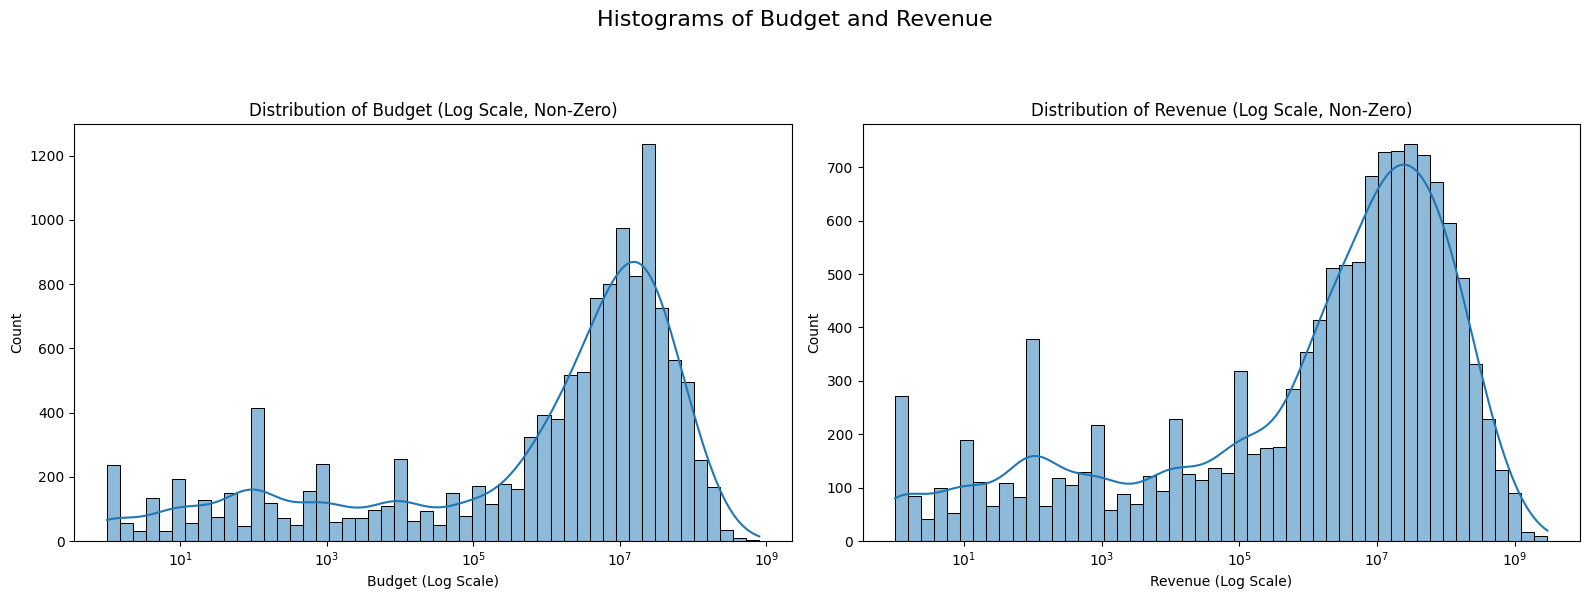

In [54]:
# Plot Histograms
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Histograms of Budget and Revenue', fontsize=16, y=1.02)

# Budget (Log Scale) - Using df_financial
sns.histplot(df_financial['budget'], bins=50, kde=True, ax=axes[0], log_scale=True) # Use axes[0]
axes[0].set_title('Distribution of Budget (Log Scale, Non-Zero)')
axes[0].set_xlabel('Budget (Log Scale)')

# Revenue (Log Scale) - Using df_financial
sns.histplot(df_financial['revenue'], bins=50, kde=True, ax=axes[1], log_scale=True) # Use axes[1]
axes[1].set_title('Distribution of Revenue (Log Scale, Non-Zero)')
axes[1].set_xlabel('Revenue (Log Scale)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

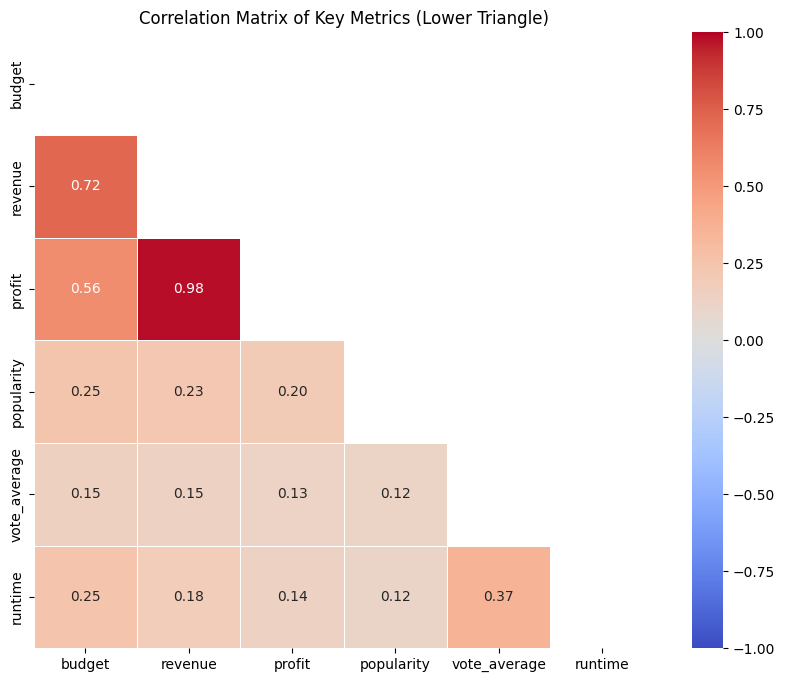

In [55]:
# Correlation Matrix & Heatmap

# Select columns for correlation analysis
correlation_cols = ['budget', 'revenue', 'profit', 'popularity', 'vote_average', 'runtime']
corr_matrix = df_financial[correlation_cols].corr()

# Create a mask to show only the lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Metrics (Lower Triangle)')
plt.show()

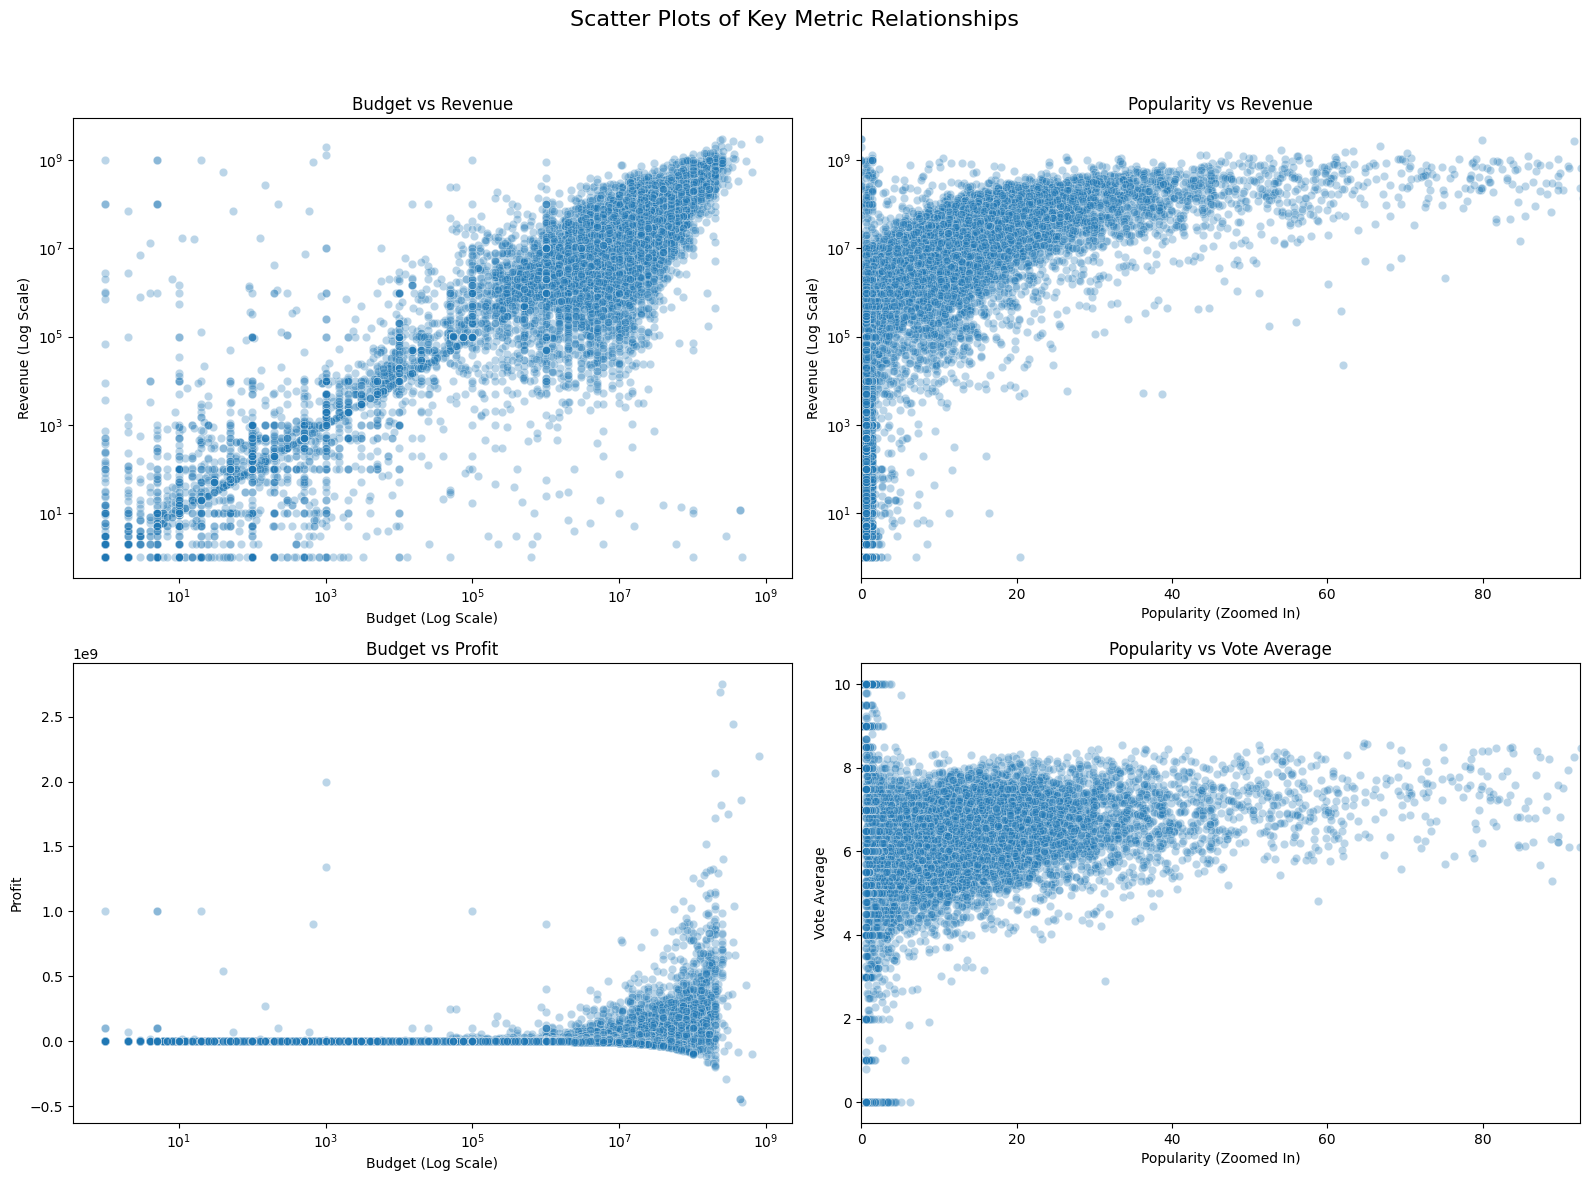

In [56]:
# Scatter Plots for Key Relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Scatter Plots of Key Metric Relationships', fontsize=16, y=1.01)

# Plot 1: Budget vs Revenue (Log Scale) - axes[0, 0]
sns.scatterplot(data=df_financial, x='budget', y='revenue', alpha=0.3, ax=axes[0, 0])
axes[0, 0].set_title('Budget vs Revenue')
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')
axes[0, 0].set_xlabel('Budget (Log Scale)')
axes[0, 0].set_ylabel('Revenue (Log Scale)')

# Plot 2: Popularity vs Revenue (Log Scale for Revenue) - axes[0, 1]
sns.scatterplot(data=df_financial, x='popularity', y='revenue', alpha=0.3, ax=axes[0, 1])
axes[0, 1].set_title('Popularity vs Revenue')
axes[0, 1].set_xlim(0, df_financial['popularity'].quantile(0.99)) # Zoom popularity
axes[0, 1].set_yscale('log')
axes[0, 1].set_xlabel('Popularity (Zoomed In)')
axes[0, 1].set_ylabel('Revenue (Log Scale)')

# Plot 3: Budget vs Profit (Log Scale for Budget) - axes[1, 0]
sns.scatterplot(data=df_financial, x='budget', y='profit', alpha=0.3, ax=axes[1, 0])
axes[1, 0].set_title('Budget vs Profit')
axes[1, 0].set_xscale('log')
axes[1, 0].set_xlabel('Budget (Log Scale)')
axes[1, 0].set_ylabel('Profit')

# Plot 4: Popularity vs Vote Average - axes[1, 1]
sns.scatterplot(data=df_financial, x='popularity', y='vote_average', alpha=0.3, ax=axes[1, 1])
axes[1, 1].set_title('Popularity vs Vote Average')
axes[1, 1].set_xlim(0, df_financial['popularity'].quantile(0.99)) # Zoom popularity
axes[1, 1].set_xlabel('Popularity (Zoomed In)')
axes[1, 1].set_ylabel('Vote Average')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

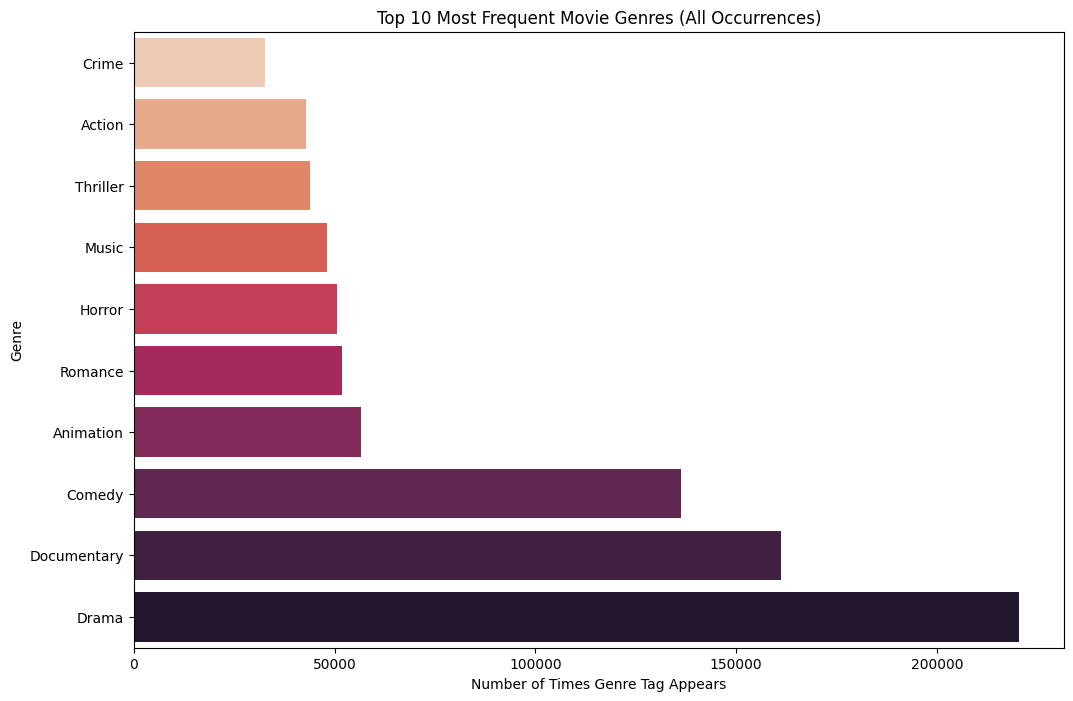

In [57]:
# Top N Genres (Based on All Genre Tags using Exploded df)
col_name = 'genres'
# Use the pre-calculated value counts
if 'value_counts_data' in locals() and col_name in value_counts_data:
    counts_exploded_genres = value_counts_data[col_name]
else:
    # Recalculate if needed
    print(f"Recalculating value counts for exploded '{col_name}'...")
    exploded = df[col_name].explode().dropna()
    exploded = exploded[~exploded.isin(['', 'Unknown', None])]
    counts_exploded_genres = exploded.value_counts()

if not counts_exploded_genres.empty:
    N = 10 # Number of top items to show
    top_n_genres_exploded = counts_exploded_genres.head(N)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_n_genres_exploded.values, y=top_n_genres_exploded.index, palette='rocket', orient='h')
    plt.title(f'Top {N} Most Frequent Movie Genres (All Occurrences)')
    plt.xlabel('Number of Times Genre Tag Appears')
    plt.ylabel('Genre')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print(f"No data to plot for exploded '{col_name}'.")

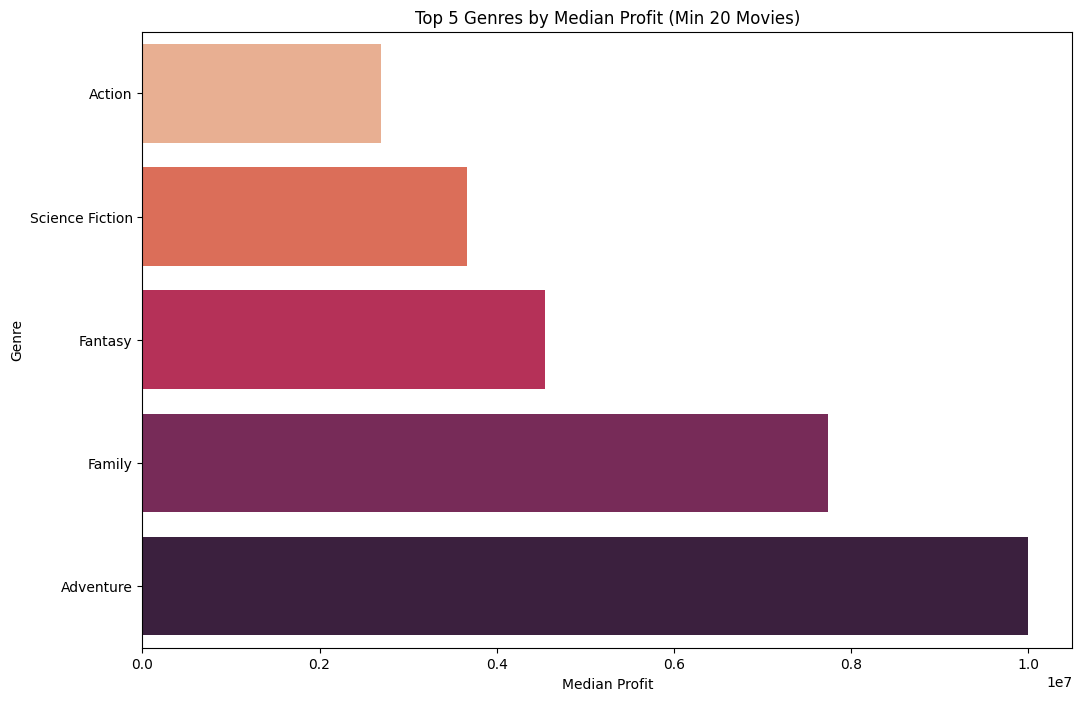

In [58]:
# Genre vs Success Metrics (using df_financial)

# Explode genres and clean
if 'df_genre_financial_analysis' not in locals(): # Simple check
     df_genre_financial_analysis = df_financial.explode('genres').dropna(subset=['genres'])
     df_genre_financial_analysis = df_genre_financial_analysis[~df_genre_financial_analysis['genres'].isin(['', 'Unknown', None])]

# Calculate median/mean metrics per genre
genre_success_metrics = df_genre_financial_analysis.groupby('genres').agg(
    median_profit=('profit', 'median'),
    median_revenue=('revenue', 'median'),
    median_popularity=('popularity', 'median'),
    mean_vote_average=('vote_average', 'mean'),
    movie_count=('id', 'count') # Assuming 'id' is unique
).reset_index()

# Filter for genres with a minimum number of movies
min_movies_per_genre = 20
genre_success_metrics_filtered = genre_success_metrics[genre_success_metrics['movie_count'] >= min_movies_per_genre]

# Plotting Top N for each metric
N = 5 # Number of top genres to show for each plot

# Plot top N genres by median profit
top_profit_genres = genre_success_metrics_filtered.sort_values('median_profit', ascending=False).head(N)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_profit_genres, y='genres', x='median_profit', palette='rocket', orient='h')
plt.title(f'Top {N} Genres by Median Profit (Min {min_movies_per_genre} Movies)')
plt.xlabel('Median Profit')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.show()


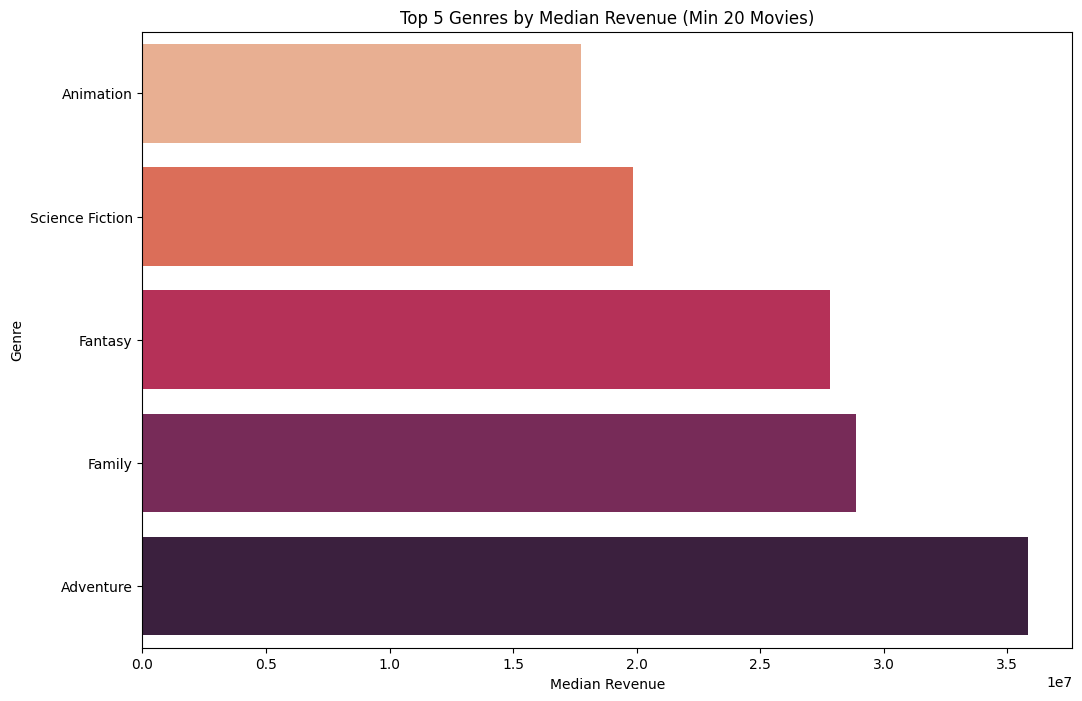

In [59]:
# Plot top N genres by median revenue
top_revenue_genres = genre_success_metrics_filtered.sort_values('median_revenue', ascending=False).head(N)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_revenue_genres, y='genres', x='median_revenue', palette='rocket', orient='h')
plt.title(f'Top {N} Genres by Median Revenue (Min {min_movies_per_genre} Movies)')
plt.xlabel('Median Revenue')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.show()


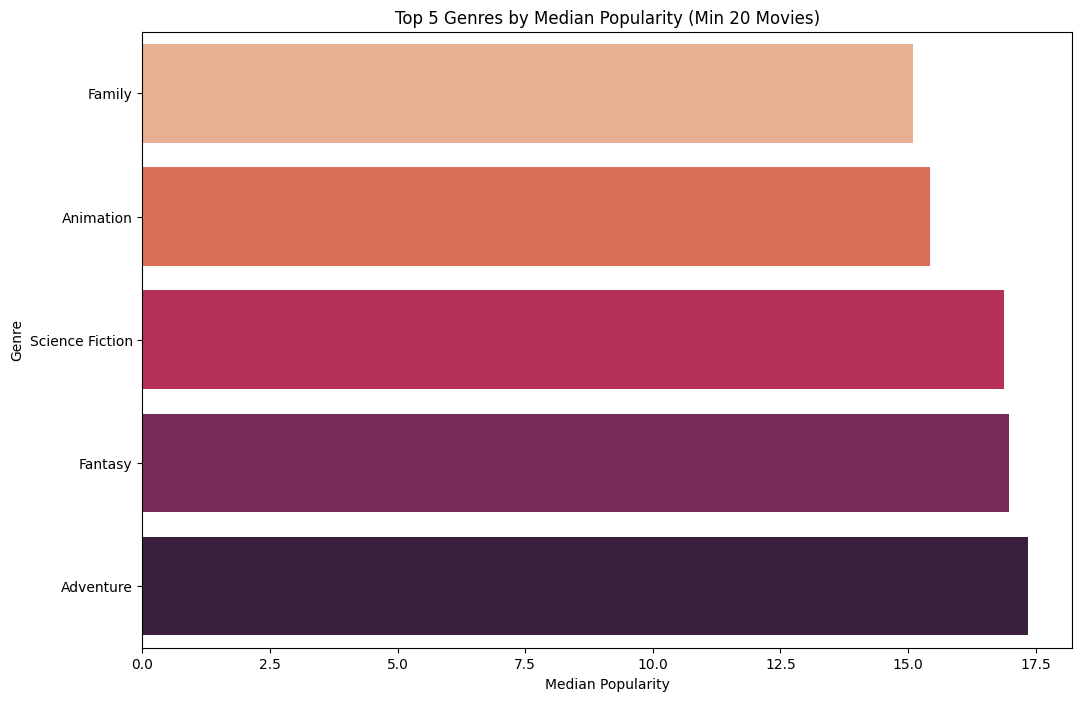

In [60]:
# Plot top N genres by median popularity
top_popularity_genres = genre_success_metrics_filtered.sort_values('median_popularity', ascending=False).head(N)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_popularity_genres, y='genres', x='median_popularity', palette='rocket', orient='h')
plt.title(f'Top {N} Genres by Median Popularity (Min {min_movies_per_genre} Movies)')
plt.xlabel('Median Popularity')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.show()

In [61]:
# Define high revenue threshold (75th percentile of NON-adjusted revenue)
high_revenue_threshold = df_financial['revenue'].quantile(0.75)
print(f"\nDefining 'High Revenue' as revenue > {high_revenue_threshold:.2f}")

# Create dataframe of high-revenue movies using 'revenue'
df_high_revenue = df_financial[df_financial['revenue'] > high_revenue_threshold].copy()
print(f"Number of high-revenue movies: {len(df_high_revenue)}")

# Create dataframe of other-revenue movies
df_other_revenue = df_financial[df_financial['revenue'] <= high_revenue_threshold].copy() # Added copy() for consistency
print(f"Number of other-revenue movies: {len(df_other_revenue)}")


# Compare properties of high-revenue movies vs. the rest (within df_financial)
print("\nComparing Median Values: High Revenue vs. Others (within df_financial)")

# Define comparison metrics
comparison_metrics = ['budget', 'popularity', 'vote_average', 'runtime', 'profit', 'roi']
comparison_data = []

# Calculate medians for high revenue group
high_rev_medians = df_high_revenue[comparison_metrics].median()
high_rev_medians['group'] = 'High Revenue'
comparison_data.append(high_rev_medians)

# Calculate medians for other movies in df_financial using 'revenue'
other_rev_medians = df_other_revenue[comparison_metrics].median()
other_rev_medians['group'] = 'Other Revenue'
comparison_data.append(other_rev_medians)

comparison_df = pd.DataFrame(comparison_data).set_index('group')
display(comparison_df.T) # Transpose for better readability



Defining 'High Revenue' as revenue > 39651178.00
Number of high-revenue movies: 3224
Number of other-revenue movies: 9671

Comparing Median Values: High Revenue vs. Others (within df_financial)


group,High Revenue,Other Revenue
budget,3.607500e+07,1500000.000
popularity,2.267700e+01,5.003
vote_average,6.622000e+00,6.087
runtime,1.100000e+02,95.000
profit,7.262441e+07,0.000
roi,2.409119e+02,0.000


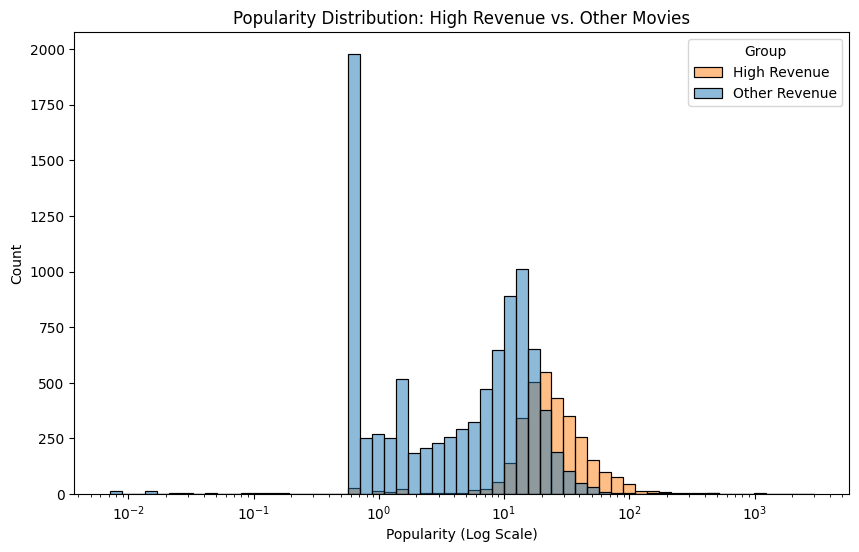

In [62]:
# Comparing Popularity Distributions (using 'revenue' for hue) between High Revenue and Other Revenue
plt.figure(figsize=(10, 6))
sns.histplot(data=df_financial, x='popularity', hue=(df_financial['revenue'] > high_revenue_threshold), kde=False, log_scale=True)
plt.title('Popularity Distribution: High Revenue vs. Other Movies')
plt.xlabel('Popularity (Log Scale)')
plt.legend(title='Group', labels=['High Revenue', 'Other Revenue'])
plt.show()

High Revenue movies are indeed less frequent than other movies but they are more popular, which explains their higher revenue compared to other movies.

Analyzing Median Revenue by Top Company and Top Genre
Exploding genres for analysis...
Top 10 Companies by Movie Count: ['Paramount', 'Universal Pictures', 'Columbia Pictures', 'Warner Bros. Pictures', 'Metro-Goldwyn-Mayer', 'New Line Cinema', 'Walt Disney Pictures', '20th Century Fox', 'Touchstone Pictures', 'United Artists']
Top 10 Genres by Movie Count (min 30): ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Adventure', 'Crime', 'Horror', 'Family', 'Science Fiction']


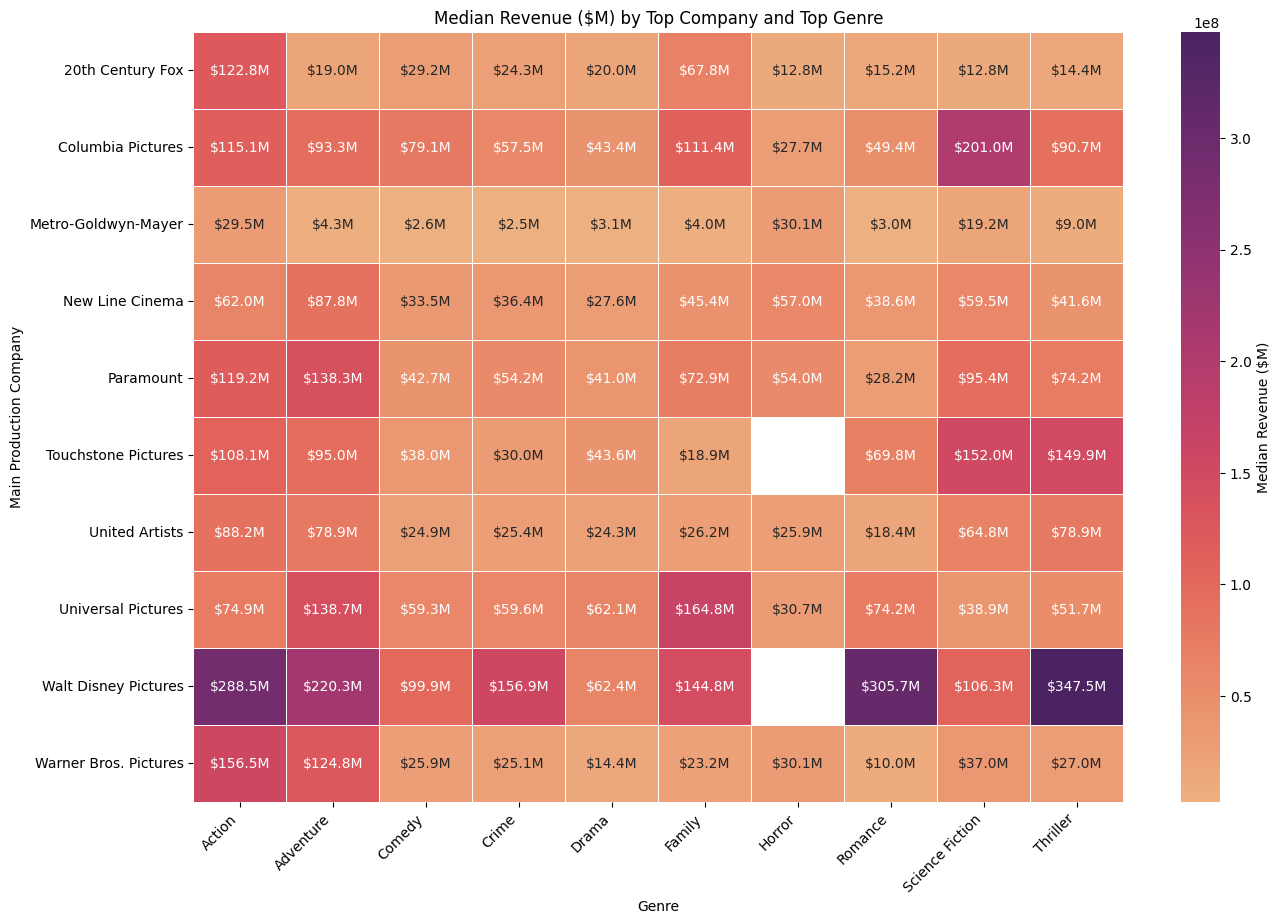

In [63]:
# Company-Genre Revenue Heatmap

print("Analyzing Median Revenue by Top Company and Top Genre")

# 1. Ensure necessary DataFrames and columns exist
required_cols_financial = ['genres', 'main_company', 'revenue', 'id', 'profit'] # Add 'profit' needed for company_metrics
if not all(col in df_financial.columns for col in required_cols_financial):
    print("Error: Required columns missing in df_financial. Cannot proceed.")

else:
    # 2. Explode genres if df_genre_analysis doesn't exist or is empty
    if 'df_genre_analysis' not in locals() or df_genre_analysis.empty:
        print("Exploding genres for analysis...")
        df_genre_analysis = df_financial.explode('genres').dropna(subset=['genres'])
        df_genre_analysis = df_genre_analysis[~df_genre_analysis['genres'].isin(['', 'Unknown', None])]

    # 3. Define Top Companies based on movie count (excluding 'Unknown')
    # Recalculate company_metrics to ensure it's up-to-date and includes 'movie_count'
    company_metrics = df_financial.groupby('main_company').agg(
        median_profit=('profit', 'median'), # Keep this aggregation even if only using count for filtering
        movie_count=('id', 'count')
    ).reset_index()
    min_movies_per_company = 10
    company_metrics_filtered = company_metrics[(company_metrics['movie_count'] >= min_movies_per_company) & (company_metrics['main_company'] != 'Unknown')]
    top_N_companies_list = company_metrics_filtered.sort_values('movie_count', ascending=False).head(10)['main_company'].tolist()
    print(f"Top 10 Companies by Movie Count: {top_N_companies_list}")

    # 4. Define Top Genres based on overall movie count in df_financial (excluding 'Unknown')
    all_genres_financial = df_financial.explode('genres')['genres'].value_counts()
    all_genres_financial = all_genres_financial[~all_genres_financial.index.isin(['', 'Unknown', None])] # Exclude Unknown
    min_movies_per_genre_overall = 30
    top_N_genres_list = all_genres_financial[all_genres_financial >= min_movies_per_genre_overall].head(10).index.tolist()
    print(f"Top 10 Genres by Movie Count (min {min_movies_per_genre_overall}): {top_N_genres_list}")

    # 5. Filter the exploded genre dataframe
    comp_genre_df = df_genre_analysis[
        df_genre_analysis['main_company'].isin(top_N_companies_list) &
        df_genre_analysis['genres'].isin(top_N_genres_list)
    ].copy()

    # 6. Create and Plot Heatmap
    if not comp_genre_df.empty:
        try:
            company_genre_pivot = pd.pivot_table(
                comp_genre_df,
                values='revenue', # Using non-adjusted revenue
                index='main_company',
                columns='genres',
                aggfunc='median'
            )

            if not company_genre_pivot.empty:
                plt.figure(figsize=(15, 10))
                # Format annotation for readability
                annot_fmt = lambda x: f"${x/1e6:.1f}M" if pd.notnull(x) else ""
                sns.heatmap(company_genre_pivot, annot=company_genre_pivot.applymap(annot_fmt), fmt="", cmap="flare", linewidths=.5, cbar_kws={'label': 'Median Revenue ($M)'})
                plt.title('Median Revenue ($M) by Top Company and Top Genre')
                plt.xlabel('Genre')
                plt.ylabel('Main Production Company')
                plt.xticks(rotation=45, ha='right')
                plt.yticks(rotation=0)
                plt.show()
            else:
                print("Pivot table is empty after aggregation. Cannot plot heatmap.")

        except Exception as e:
            print(f"Could not create pivot table/heatmap. Error: {e}")
            print("This might happen if combinations are sparse or data issues exist.")
    else:
        print("Filtered DataFrame for Company-Genre analysis is empty (no movies match top company/genre criteria). Skipping heatmap.")

# Data Querying


In [64]:
print("\n--- Query: Top 5 Movies by Profit ---")

# Use a Common Table Expression (CTE) to calculate profit first
query_top_profit_details = """
WITH MovieProfit AS (
    -- Calculate profit for relevant movies
    SELECT
        id,
        title,
        (revenue - budget) AS profit
    FROM Movies
    WHERE revenue IS NOT NULL AND budget IS NOT NULL AND revenue > 0 AND budget > 0
)
-- Join profitable movies with genres and languages, then aggregate
SELECT
    MP.id,
    MP.title,
    MP.profit,
    GROUP_CONCAT(DISTINCT G.name) AS genres,       -- Aggregate distinct genre names
    GROUP_CONCAT(DISTINCT L.name) AS spoken_languages -- Aggregate distinct language names
FROM
    MovieProfit MP
    LEFT JOIN MovieGenres MG ON MP.id = MG.movie_id
    LEFT JOIN Genres G ON MG.genre_id = G.genre_id
    LEFT JOIN MovieLanguages ML ON MP.id = ML.movie_id
    LEFT JOIN Languages L ON ML.language_id = L.language_id
GROUP BY
    MP.id, MP.title, MP.profit -- Group by movie to aggregate genres/languages
ORDER BY
    MP.profit DESC -- Order by the calculated profit
LIMIT 5;             -- Get the top 5
"""

top_profit_df = pd.read_sql_query(query_top_profit_details, conn)

if not top_profit_df.empty:
    pd.set_option('display.max_colwidth', None) # Show full genre/language strings
    pd.set_option('display.float_format', '{:,.0f}'.format) # Format profit as integer
    display(top_profit_df)
else:
    print("No movies found with valid profit data.")


--- Query: Top 5 Movies by Profit ---


,id,title,profit,genres,spoken_languages
0,1270893,TikTok Rizz Party,2750000000,"Comedy,Drama",None
1,19995,Avatar,2686706026,"Action,Adventure,Fantasy,Science Fiction","English,Spanish"
2,299534,Avengers: Endgame,2444000000,"Action,Adventure,Science Fiction","English,Japanese,Xhosa"
3,1224207,Adventures in Bora Bora,2200000000,"Horror,War",English
4,597,Titanic,2064162353,"Drama,Romance","English,French,German,Italian,Russian,Swedish"


In [65]:
# ## Genres by Average Profit (Last 10 Years)

print("\n--- Query: Genres by Average Profit (Last 10 Years, Min 5 Movies) ---")

# Calculate the date 10 years ago using SQLite's date function
query_avg_profit_genre = """
WITH RecentMovieProfit AS (
    -- Calculate profit for movies released in the last 10 years
    SELECT
        M.id,
        (M.revenue - M.budget) AS profit
    FROM Movies M
    WHERE
        M.revenue IS NOT NULL AND M.budget IS NOT NULL
        AND M.revenue > 0 AND M.budget > 0 -- Ensure meaningful profit calculation
        AND M.release_date IS NOT NULL AND M.release_date != ''
        AND M.release_date >= date('now', '-10 years') -- Filter by date
)
-- Join with Genres and aggregate per genre
SELECT
    G.name AS genre,
    AVG(RMP.profit) AS average_profit,
    COUNT(DISTINCT RMP.id) AS movie_count -- Count unique movies contributing
FROM
    RecentMovieProfit RMP
    JOIN MovieGenres MG ON RMP.id = MG.movie_id
    JOIN Genres G ON MG.genre_id = G.genre_id
GROUP BY
    G.genre_id, G.name -- Group by genre
HAVING
    COUNT(DISTINCT RMP.id) >= 5 -- Only show genres with at least 5 movies in the period
ORDER BY
    average_profit DESC; -- Highest average profit first
"""

avg_profit_df = pd.read_sql_query(query_avg_profit_genre, conn)

if not avg_profit_df.empty:
    # Apply formatting for better readability
    pd.set_option('display.float_format', '${:,.0f}'.format) # Format profit as currency
    display(avg_profit_df.head(10)) # Display top 10 or fewer
else:
    print("No genres found meeting the criteria.")

# Reset float format
pd.reset_option('display.float_format')


--- Query: Genres by Average Profit (Last 10 Years, Min 5 Movies) ---


,genre,average_profit,movie_count
0,Adventure,"$137,029,726",588
1,Science Fiction,"$124,156,887",337
2,Animation,"$97,960,184",247
3,Fantasy,"$92,250,415",343
4,Family,"$88,945,264",341
5,Action,"$81,898,194",954
6,War,"$53,960,291",125
7,Comedy,"$38,384,461",1281
8,Music,"$36,013,087",196
9,Thriller,"$31,648,775",834


In [66]:
# ## Average Profit by Language (Last 10 Years)

print("\n--- Query: Average Profit by Language (Last 10 Years, Min 5 Movies) ---")

# Use the same CTE definition as the previous query
base_cte_last_10 = """
WITH RecentMovieProfit AS (
    SELECT
        M.id,
        (M.revenue - M.budget) AS profit
    FROM Movies M
    WHERE
        M.revenue IS NOT NULL AND M.budget IS NOT NULL
        AND M.revenue > 0 AND M.budget > 0
        AND M.release_date IS NOT NULL AND M.release_date != ''
        AND M.release_date >= date('now', '-10 years')
)
"""

# --- Language Query ---
query_avg_profit_language = base_cte_last_10 + """
SELECT
    L.name AS language,
    AVG(RMP.profit) AS average_profit,
    COUNT(DISTINCT RMP.id) AS movie_count
FROM
    RecentMovieProfit RMP
    JOIN MovieLanguages ML ON RMP.id = ML.movie_id
    JOIN Languages L ON ML.language_id = L.language_id
GROUP BY
    L.language_id, L.name
HAVING
    COUNT(DISTINCT RMP.id) >= 5 -- Minimum movies per language
ORDER BY
    average_profit DESC;
"""

avg_profit_lang_df = pd.read_sql_query(query_avg_profit_language, conn)

if not avg_profit_lang_df.empty:
    pd.set_option('display.float_format', '${:,.0f}'.format) # Format currency
    display(avg_profit_lang_df.head(10)) # Display top 10
else:
    print("No languages found meeting the criteria.")



--- Query: Average Profit by Language (Last 10 Years, Min 5 Movies) ---


,language,average_profit,movie_count
0,Cantonese,"$133,645,316",23
1,Mandarin,"$126,720,011",92
2,Tagalog,"$123,081,999",18
3,Dutch,"$107,882,436",18
4,Japanese,"$98,141,056",77
5,Czech,"$83,796,272",9
6,Romanian,"$81,351,315",15
7,Hebrew,"$79,972,251",33
8,Malay,"$75,518,224",10
9,Korean,"$67,591,794",56


In [67]:
# ## Average Profit by Production Country (Last 10 Years)

print("\n--- Query: Average Profit by Production Country (Last 10 Years, Min 5 Movies) ---")

# --- Country Query ---
query_avg_profit_country = base_cte_last_10 + """
SELECT
    C.name AS production_country,
    AVG(RMP.profit) AS average_profit,
    COUNT(DISTINCT RMP.id) AS movie_count
FROM
    RecentMovieProfit RMP
    JOIN MovieCountries MC ON RMP.id = MC.movie_id
    JOIN Countries C ON MC.country_id = C.country_id
GROUP BY
    C.country_id, C.name
HAVING
    COUNT(DISTINCT RMP.id) >= 5 -- Minimum movies per country
ORDER BY
    average_profit DESC;
"""

avg_profit_country_df = pd.read_sql_query(query_avg_profit_country, conn)

if not avg_profit_country_df.empty:
    # Float format should still be set from above
    display(avg_profit_country_df.head(10)) # Display top 10
else:
    print("No production countries found meeting the criteria.")

# Reset float format
pd.reset_option('display.float_format')



--- Query: Average Profit by Production Country (Last 10 Years, Min 5 Movies) ---


,production_country,average_profit,movie_count
0,China,"$110,166,365",114
1,Hong Kong,"$106,028,971",42
2,United States of America,"$76,011,315",1626
3,Japan,"$73,721,330",62
4,Serbia,"$54,510,218",6
5,Morocco,"$52,986,751",9
6,Taiwan,"$52,580,882",8
7,South Korea,"$44,121,625",56
8,United Kingdom,"$41,713,583",364
9,Iceland,"$40,515,762",9


In [68]:
# ## More Analysis (Last 10 Years)

MIN_VOTE_COUNT = 100
MIN_MOVIES_PER_GROUP = 5

# --- Base CTE (Filters for Last 10 Years & includes adult column) ---
base_cte_last_15 = f"""
WITH RecentValidMovies AS (
    SELECT
        M.id, M.title, M.release_date, M.vote_average, M.vote_count,
        M.budget, M.revenue, (M.revenue - M.budget) AS profit, M.runtime,
        M.adult
    FROM Movies M
    WHERE M.revenue > 0 AND M.budget > 0
      AND M.vote_average > 0 AND M.vote_count >= ?
      AND M.release_date IS NOT NULL AND M.release_date != ''
      AND M.release_date >= date('now', '-10 years')
      AND M.adult IN (0, 1)
)
"""
base_params = (MIN_VOTE_COUNT,)

# Set Pandas Display Options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.float_format', '{:,.2f}'.format)

print("\n--- Query: Top Overall Movies (Profit & Rating) ---")
sql1 = base_cte_last_15 + """
SELECT
    RVM.title, RVM.profit, RVM.vote_average, RVM.release_date, RVM.id
FROM RecentValidMovies RVM
ORDER BY RVM.profit DESC, RVM.vote_average DESC
LIMIT 10;
"""
df1 = pd.read_sql_query(sql1, conn, params=base_params)
display(df1.style.format({'profit': '${:,.0f}'})) if not df1.empty else print(" -> No data found.")




--- Query: Top Overall Movies (Profit & Rating) ---


,title,profit,vote_average,release_date,id
0,Avengers: Endgame,"$2,444,000,000",8.263000,2019-04-24,299534
1,Avatar: The Way of Water,"$1,860,250,281",7.654000,2022-12-14,76600
2,Star Wars: The Force Awakens,"$1,823,223,624",7.293000,2015-12-15,140607
3,Avengers: Infinity War,"$1,752,415,039",8.255000,2018-04-25,299536
4,Spider-Man: No Way Home,"$1,721,847,111",7.990000,2021-12-15,634649
5,Jurassic World,"$1,521,537,444",6.682000,2015-06-06,135397
6,The Lion King,"$1,403,075,401",7.100000,2019-07-12,420818
7,Top Gun: Maverick,"$1,318,732,821",8.260000,2022-05-24,361743
8,Frozen II,"$1,300,026,933",7.272000,2019-11-20,330457
9,Barbie,"$1,283,545,028",7.279000,2023-07-19,346698


In [69]:
print("\n--- Query: Performance by Budget Range ---")
sql3 = base_cte_last_15 + """
SELECT
    CASE
        WHEN RVM.budget < 10000000 THEN '1. < $10M'
        WHEN RVM.budget < 50000000 THEN '2. $10M - $50M'
        WHEN RVM.budget < 100000000 THEN '3. $50M - $100M'
        WHEN RVM.budget < 150000000 THEN '4. $100M - $150M'
        WHEN RVM.budget < 200000000 THEN '5. $150M - $200M'
        ELSE '6. $200M+'
    END AS budget_range,
    AVG(RVM.profit) AS average_profit, AVG(RVM.vote_average) AS average_rating,
    COUNT(RVM.id) AS movie_count, MIN(RVM.budget) AS range_start_budget
FROM RecentValidMovies RVM
GROUP BY budget_range
HAVING COUNT(RVM.id) >= ?
ORDER BY range_start_budget;
"""
df3 = pd.read_sql_query(sql3, conn, params=base_params + (MIN_MOVIES_PER_GROUP,))
display(df3[['budget_range', 'average_profit', 'average_rating', 'movie_count']].style.format({'average_profit': '${:,.0f}'})) if not df3.empty else print(" -> No data found.")



--- Query: Performance by Budget Range ---


,budget_range,average_profit,average_rating,movie_count
0,1. < $10M,"$11,792,628",6.591078,472
1,2. $10M - $50M,"$37,428,791",6.627797,655
2,3. $50M - $100M,"$147,921,103",6.807523,176
3,4. $100M - $150M,"$215,427,440",6.669817,71
4,5. $150M - $200M,"$399,589,474",6.993574,68
5,6. $200M+,"$563,198,547",7.127811,53


In [70]:
print("\n--- Query: Performance by Runtime Range ---")
sql4 = base_cte_last_15 + """
SELECT
    CASE
        WHEN RVM.runtime < 90 THEN '1. < 90 min'
        WHEN RVM.runtime < 110 THEN '2. 90-109 min'
        WHEN RVM.runtime < 130 THEN '3. 110-129 min'
        WHEN RVM.runtime < 150 THEN '4. 130-149 min'
        ELSE '5. 150+ min'
    END AS runtime_range,
    AVG(RVM.profit) AS average_profit, AVG(RVM.vote_average) AS average_rating,
    COUNT(RVM.id) AS movie_count, MIN(RVM.runtime) AS range_start_runtime
FROM RecentValidMovies RVM
WHERE RVM.runtime IS NOT NULL AND RVM.runtime > 0
GROUP BY runtime_range
HAVING COUNT(RVM.id) >= ?
ORDER BY range_start_runtime;
"""
df4 = pd.read_sql_query(sql4, conn, params=base_params + (MIN_MOVIES_PER_GROUP,))
display(df4[['runtime_range', 'average_profit', 'average_rating', 'movie_count']].style.format({'average_profit': '${:,.0f}'})) if not df4.empty else print(" -> No data found.")



--- Query: Performance by Runtime Range ---


,runtime_range,average_profit,average_rating,movie_count
0,1. < 90 min,"$41,492,785",6.230525,118
1,2. 90-109 min,"$49,485,092",6.470360,650
2,3. 110-129 min,"$93,722,105",6.798848,462
3,4. 130-149 min,"$167,921,467",7.125711,201
4,5. 150+ min,"$223,746,293",7.233469,64


In [71]:
print("\n--- Query: Performance by Production Country ---")
sql6 = base_cte_last_15 + """
SELECT
    C.name AS production_country, AVG(RVM.profit) AS average_profit,
    AVG(RVM.vote_average) AS average_rating, COUNT(DISTINCT RVM.id) AS movie_count
FROM RecentValidMovies RVM
JOIN MovieCountries MC ON RVM.id = MC.movie_id
JOIN Countries C ON MC.country_id = C.country_id
GROUP BY C.name
HAVING COUNT(DISTINCT RVM.id) >= ?
ORDER BY average_profit DESC
LIMIT 10;
"""
df6 = pd.read_sql_query(sql6, conn, params=base_params + (MIN_MOVIES_PER_GROUP,))
display(df6.style.format({'average_profit': '${:,.0f}'})) if not df6.empty else print(" -> No data found.")

# Reset float format
pd.reset_option('display.float_format')



--- Query: Performance by Production Country ---


,production_country,average_profit,average_rating,movie_count
0,Japan,"$122,665,978",6.784351,37
1,China,"$115,772,184",6.583911,90
2,United States of America,"$106,530,180",6.635279,1111
3,Hong Kong,"$86,105,470",6.594750,32
4,Taiwan,"$84,269,666",6.908000,5
5,Australia,"$76,620,184",6.729281,32
6,New Zealand,"$65,346,459",6.682000,8
7,United Kingdom,"$59,780,429",6.638438,233
8,Morocco,"$59,610,091",6.268625,8
9,India,"$59,225,461",6.999136,59


In [72]:
from datetime import datetime # Import the datetime class
# Date filter: only include movies from the last 10 years
cutoff_date = (datetime.now().replace(day=1, month=1) - pd.DateOffset(years=10)).strftime('%Y-%m-%d')

print("\n--- Query: Production Companies with Consistent High Ratings (Last 10 Years) ---")

# Parameters
MIN_VOTES_COMPANY = 500
MIN_RATING_COMPANY = 7
MIN_MOVIES_COMPANY = 5

# Updated query with release_date filter
query_consistent_companies = f"""
WITH RatedMovies AS (
    SELECT id, vote_average
    FROM Movies
    WHERE vote_count >= ?
      AND release_date >= ?
)
SELECT
    C.name AS company_name,
    AVG(RM.vote_average) AS average_rating,
    COUNT(DISTINCT M.id) AS qualifying_movie_count
FROM
    Movies M
    JOIN RatedMovies RM ON M.id = RM.id
    JOIN MovieCompanies MC ON M.id = MC.movie_id
    JOIN Companies C ON MC.company_id = C.company_id
GROUP BY
    C.company_id, C.name
HAVING
    COUNT(DISTINCT M.id) >= ?
    AND AVG(RM.vote_average) >= ?
ORDER BY
    average_rating DESC,
    qualifying_movie_count DESC
LIMIT 5;
"""

# Params must match the placeholders order: votes, date, movies, rating
params_company = (MIN_VOTES_COMPANY, cutoff_date, MIN_MOVIES_COMPANY, MIN_RATING_COMPANY)

# Execute and display
companies_df = pd.read_sql_query(query_consistent_companies, conn, params=params_company)

if not companies_df.empty:
    pd.set_option('display.float_format', '{:,.2f}'.format)
    display(companies_df.style.format({
        'qualifying_movie_count': '{:,.0f}'
    }))
else:
    print("No production companies found meeting the specified consistency criteria (last 10 years).")

pd.reset_option('display.float_format')



--- Query: Production Companies with Consistent High Ratings (Last 10 Years) ---


,company_name,average_rating,qualifying_movie_count
0,Pixar,7.523462,13
1,Walt Disney Animation Studios,7.396286,7
2,Marvel Studios,7.373909,22
3,New Republic Pictures,7.342400,5
4,Union Investment Partners,7.287714,7


In [73]:
# Calculate the cutoff date (10 years ago from today)
cutoff_date = (datetime.now().replace(day=1, month=1) - pd.DateOffset(years=10)).strftime('%Y-%m-%d')

# --- Database Interaction ---
try:
    conn = sqlite3.connect(db_path)
except sqlite3.Error as e:
    print(f"Error connecting to database: {e}")
    raise

print("\n--- Query: Average Profit: Adult vs Non-Adult Movies (Last 10 Years) ---")

query_adult_profit = """
SELECT
    CASE
        WHEN adult = 1 THEN 'Adult Movies'
        ELSE 'Non-Adult Movies'
    END AS category,
    AVG(revenue - budget) AS average_profit,
    COUNT(*) AS movie_count
FROM Movies
WHERE
    revenue IS NOT NULL
    AND budget IS NOT NULL
    AND revenue > 0
    AND budget > 0
    AND adult IN (0, 1)
    AND release_date >= ?
GROUP BY
    adult
ORDER BY
    category;
"""

try:
    adult_profit_df = pd.read_sql_query(query_adult_profit, conn, params=(cutoff_date,))

    if not adult_profit_df.empty:
        pd.set_option('display.float_format', '${:,.0f}'.format)
        display(adult_profit_df)
        pd.reset_option('display.float_format')
    else:
        print("No data found for adult vs non-adult profit comparison (last 10 years).")

except Exception as e:
    print(f"Error executing query: {e}")



--- Query: Average Profit: Adult vs Non-Adult Movies (Last 10 Years) ---


,category,average_profit,movie_count
0,Adult Movies,"$-5,604,265",76
1,Non-Adult Movies,"$36,545,156",4418


In [74]:
MIN_MOVIES_PER_COMBO = 5
TOP_K_COMBINATIONS = 10  # Changed from 15 to 10
cutoff_date = (datetime.now().replace(day=1, month=1) - pd.DateOffset(years=10)).strftime('%Y-%m-%d')

# --- Database Connection ---
try:
    conn = sqlite3.connect(db_path)
except sqlite3.Error as e:
    print(f"Error connecting to database: {e}")
    raise
print(f"\n--- Query: Top {TOP_K_COMBINATIONS} Most Profitable Production Company Combinations (Min {MIN_MOVIES_PER_COMBO} Movies, Last 10 Years) ---")

query_company_combos = """
WITH MovieProfit AS (
    SELECT id, (revenue - budget) AS profit
    FROM Movies
    WHERE revenue IS NOT NULL AND budget IS NOT NULL
      AND revenue > 0 AND budget > 0
      AND release_date >= ?
),
MovieCompanyCombo AS (
    SELECT MP.id AS movie_id, MP.profit, GROUP_CONCAT(DISTINCT C.name) AS company_combination
    FROM MovieProfit MP
    JOIN MovieCompanies MC ON MP.id = MC.movie_id
    JOIN Companies C ON MC.company_id = C.company_id
    GROUP BY MP.id, MP.profit
)
SELECT company_combination, AVG(profit) AS average_profit, COUNT(movie_id) AS movie_count
FROM MovieCompanyCombo
WHERE company_combination IS NOT NULL
GROUP BY company_combination
HAVING COUNT(movie_id) >= ?
ORDER BY average_profit DESC
LIMIT ?;
"""

params_companies = (cutoff_date, MIN_MOVIES_PER_COMBO, TOP_K_COMBINATIONS)

try:
    df_company = pd.read_sql_query(query_company_combos, conn, params=params_companies)
    if not df_company.empty:
        pd.set_option('display.max_colwidth', 150)
        pd.set_option('display.float_format', '${:,.0f}'.format)
        display(df_company)
        pd.reset_option('display.max_colwidth')
        pd.reset_option('display.float_format')
    else:
        print("No company combinations found meeting the criteria.")
except Exception as e:
    print(f"Error during company combo query: {e}")



--- Query: Top 10 Most Profitable Production Company Combinations (Min 5 Movies, Last 10 Years) ---


,company_combination,average_profit,movie_count
0,Marvel Studios,"$816,783,753",15
1,"Walt Disney Pictures,Pixar","$533,142,981",5
2,"Pixar,Walt Disney Pictures","$222,061,902",6
3,Yash Raj Films,"$22,926,629",5
4,Iranian Independents,"$622,000",8
5,German Wrestling Federation,"$129,316",8
6,Warriors Of Wrestling (WOW),"$33,530",6
7,Bar Wrestling,"$19,310",12
8,Women's Superstars United (WSU),"$18,223",5
9,World Wonder Ring Stardom,"$17,965",7


In [75]:
print(f"\n--- Query: Top {TOP_K_COMBINATIONS} Most Profitable Production Country Combinations (Min {MIN_MOVIES_PER_COMBO} Movies, Last 10 Years) ---")

query_country_combos = """
WITH MovieProfit AS (
    SELECT id, (revenue - budget) AS profit
    FROM Movies
    WHERE revenue IS NOT NULL AND budget IS NOT NULL
      AND revenue > 0 AND budget > 0
      AND release_date >= ?
),
MovieCountryCombo AS (
    SELECT MP.id AS movie_id, MP.profit, GROUP_CONCAT(DISTINCT C.name) AS country_combination
    FROM MovieProfit MP
    JOIN MovieCountries MC ON MP.id = MC.movie_id
    JOIN Countries C ON MC.country_id = C.country_id
    GROUP BY MP.id, MP.profit
)
SELECT country_combination, AVG(profit) AS average_profit, COUNT(movie_id) AS movie_count
FROM MovieCountryCombo
WHERE country_combination IS NOT NULL
GROUP BY country_combination
HAVING COUNT(movie_id) >= ?
ORDER BY average_profit DESC
LIMIT ?;
"""

params_countries = (cutoff_date, MIN_MOVIES_PER_COMBO, TOP_K_COMBINATIONS)

try:
    df_country = pd.read_sql_query(query_country_combos, conn, params=params_countries)
    if not df_country.empty:
        pd.set_option('display.max_colwidth', 150)
        pd.set_option('display.float_format', '${:,.0f}'.format)
        display(df_country)
        pd.reset_option('display.max_colwidth')
        pd.reset_option('display.float_format')
    else:
        print("No country combinations found meeting the criteria.")
except Exception as e:
    print(f"Error during country combo query: {e}")



--- Query: Top 10 Most Profitable Production Country Combinations (Min 5 Movies, Last 10 Years) ---


,country_combination,average_profit,movie_count
0,"China,Hong Kong","$291,117,498",6
1,"United States of America,Japan","$182,607,908",13
2,"China,United States of America,Japan","$174,222,183",5
3,"Hong Kong,China","$148,396,556",6
4,"United States of America,China","$134,088,088",11
5,China,"$131,329,774",31
6,"United Kingdom,United States of America","$119,607,064",45
7,"United States of America,Germany","$102,331,318",8
8,"United States of America,United Kingdom,France","$102,050,733",5
9,"China,United States of America","$96,805,292",14


In [76]:
MIN_MOVIES_PER_COMBO = 5
TOP_K_COMBINATIONS = 10  # Changed from 20 to 10
cutoff_date = (datetime.now().replace(day=1, month=1) - pd.DateOffset(years=10)).strftime('%Y-%m-%d')

# --- Database Interaction ---
try:
    conn = sqlite3.connect(db_path)
except sqlite3.Error as e:
    print(f"Error connecting to database: {e}")
    raise

# --- Query: Genre Combinations (Last 10 Years) ---
print(f"\n--- Query: Top {TOP_K_COMBINATIONS} Most Profitable Genre Combinations (Min {MIN_MOVIES_PER_COMBO} Movies, Last 10 Years) ---")

query_genre_combos = f"""
WITH MovieProfit AS (
    SELECT
        id,
        (revenue - budget) AS profit
    FROM Movies
    WHERE revenue IS NOT NULL
      AND budget IS NOT NULL
      AND revenue > 0
      AND budget > 0
      AND release_date >= ? -- Filter for last 10 years
),
MovieGenreCombo AS (
    SELECT
        MP.id AS movie_id,
        MP.profit,
        GROUP_CONCAT(DISTINCT G.name) AS genre_combination
    FROM MovieProfit MP
    JOIN MovieGenres MG ON MP.id = MG.movie_id
    JOIN Genres G ON MG.genre_id = G.genre_id
    GROUP BY MP.id, MP.profit
)
SELECT
    MGC.genre_combination,
    AVG(MGC.profit) AS average_profit,
    COUNT(MGC.movie_id) AS movie_count
FROM MovieGenreCombo MGC
WHERE genre_combination IS NOT NULL
GROUP BY MGC.genre_combination
HAVING COUNT(MGC.movie_id) >= ?
ORDER BY average_profit DESC
LIMIT ?;
"""

# Parameters: cutoff date, min movies per combo, top K combinations
params_genres = (cutoff_date, MIN_MOVIES_PER_COMBO, TOP_K_COMBINATIONS)

# Execute and Display
try:
    genre_combos_df = pd.read_sql_query(query_genre_combos, conn, params=params_genres)
    if not genre_combos_df.empty:
        pd.set_option('display.max_colwidth', 200)
        pd.set_option('display.float_format', '${:,.0f}'.format)
        display(genre_combos_df)
        pd.reset_option('display.max_colwidth')
        pd.reset_option('display.float_format')
    else:
        print(f"No genre combinations found meeting the criteria.")
except sqlite3.Error as e:
    print(f"Error executing genre combinations query: {e}")
except Exception as e:
    print(f"An unexpected error occurred during genre query execution: {e}")



--- Query: Top 10 Most Profitable Genre Combinations (Min 5 Movies, Last 10 Years) ---


,genre_combination,average_profit,movie_count
0,"Action,Adventure,Science Fiction","$505,196,383",39
1,"Science Fiction,Action,Adventure","$299,826,503",13
2,"Adventure,Science Fiction,Action","$299,346,667",10
3,"Family,Adventure,Drama","$290,562,754",5
4,"Animation,Comedy,Family","$288,106,952",5
5,"Action,Fantasy,Adventure","$274,781,113",8
6,"Adventure,Action,Fantasy","$262,563,993",9
7,"Comedy,Fantasy,Adventure","$246,968,779",6
8,"Fantasy,Action,Adventure","$242,863,702",9
9,"Fantasy,Adventure,Family","$241,280,596",6


In [77]:
MIN_MOVIES_PER_LANGUAGE = 5
TOP_K_LANGUAGES = 10

# Calculate cutoff date for the last 10 years
cutoff_date = (datetime.now().replace(day=1, month=1) - pd.DateOffset(years=10)).strftime('%Y-%m-%d')

# --- Database Interaction ---
try:
    conn = sqlite3.connect(db_path)
except sqlite3.Error as e:
    print(f"Error connecting to database: {e}")
    raise

# --- Query: Average Profit by Original Language ---
print(f"\n--- Query: Top {TOP_K_LANGUAGES} Original Languages by Average Profit (Min {MIN_MOVIES_PER_LANGUAGE} Movies, Last 10 Years) ---")

query_lang_profit = f"""
SELECT
    original_language,
    AVG(revenue - budget) AS average_profit,
    COUNT(id) AS movie_count
FROM
    Movies
WHERE
    revenue IS NOT NULL
    AND budget IS NOT NULL
    AND revenue > 0
    AND budget > 0
    AND original_language IS NOT NULL
    AND original_language != ''
    AND release_date >= ?               -- Filter for last 10 years
GROUP BY
    original_language
HAVING
    COUNT(id) >= ?
ORDER BY
    average_profit DESC
LIMIT ?;
"""

params_lang = (cutoff_date, MIN_MOVIES_PER_LANGUAGE, TOP_K_LANGUAGES)

# Execute and Display Language Profit
try:
    lang_profit_df = pd.read_sql_query(query_lang_profit, conn, params=params_lang)
    if not lang_profit_df.empty:
        pd.set_option('display.float_format', '${:,.0f}'.format)
        display(lang_profit_df)
        pd.reset_option('display.float_format')
    else:
        print(f"No original languages found meeting the criteria.")
except sqlite3.Error as e:
    print(f"Error executing language profit query: {e}")
except Exception as e:
    print(f"An unexpected error occurred during language query execution: {e}")



--- Query: Top 10 Original Languages by Average Profit (Min 5 Movies, Last 10 Years) ---


,original_language,average_profit,movie_count
0,zh,"$127,010,219",58
1,he,"$110,643,817",18
2,cn,"$76,959,944",6
3,en,"$50,047,097",2817
4,ko,"$46,897,229",49
5,ja,"$34,334,800",24
6,te,"$27,597,946",35
7,hi,"$14,484,516",113
8,pt,"$14,393,557",213
9,kn,"$13,492,672",12


In [78]:
if conn:
    print("\n--- Closing SQLite database connection ---")
    conn.close()
    print("Connection closed.")
    # Optional: Clear variables if desired
    conn = None
    cursor = None
    df = None
    lookup_maps = None
else:
    print("\nConnection already closed or was never opened.")


--- Closing SQLite database connection ---
Connection closed.


# Cloud

In [79]:
# ----- GCP Configuration & Authentication -----
import os
from google.colab import auth
from google.cloud import storage

# --- User Configuration ---
GCP_PROJECT_ID = 'msba305project-457316' # <-- YOUR Project ID
GCS_BUCKET_NAME = 'msba305data'     # <-- REPLACE with your Bucket Name
# --------------------------

# Define base GCS paths for outputs
GCS_OUTPUT_DATA_PATH = f"gs://{GCS_BUCKET_NAME}/data/output"
GCS_DB_PATH = f"gs://{GCS_BUCKET_NAME}/database"
GCS_NOTEBOOK_PATH = f"gs://{GCS_BUCKET_NAME}/notebooks" # Optional path for the notebook itself

print(f"Using GCP Project: {GCP_PROJECT_ID}")
print(f"Using GCS Bucket: {GCS_BUCKET_NAME}")

# Authenticate the Colab user
try:
    print("Authenticating Colab user...")
    auth.authenticate_user(project_id=GCP_PROJECT_ID) # Specify project_id during auth
    print("Authentication successful.")
except Exception as e:
    print(f"Colab Authentication failed: {e}")
    # You might need to manually authorize in the popup window

# Install necessary library
print("\nInstalling google-cloud-storage...")
!pip install google-cloud-storage -q

print("Setup cell complete.")

Using GCP Project: msba305project-457316
Using GCS Bucket: msba305data
Authenticating Colab user...
Authentication successful.

Installing google-cloud-storage...
Setup cell complete.


In [80]:
# ----- Upload Final Outputs to GCS -----
import os # Make sure os is imported if not already
from google.cloud import storage # Make sure storage is imported

print("\nPreparing to upload results to GCS...")

# ===>>> ACTION REQUIRED: Define LOCAL paths <<<===
# Adjust these paths to exactly where your notebook saves the files!

# --- Option 1: If saved directly in Colab's temporary runtime ---
local_cleaned_main_path = 'cleaned_tmdb_movies_main.csv'
local_cleaned_financial_path = 'cleaned_tmdb_movies_financial.csv'
# Check your DB connection code: did it use just the filename or a Drive path?
local_db_path = 'tmdb_movies.db' # Default if just filename was used


# Define GCS destination paths (relative to the bucket root)
# These use the GCS_BUCKET_NAME defined in the setup cell
gcs_cleaned_main_blob_name = 'data/output/cleaned_tmdb_movies_main.csv'
gcs_cleaned_financial_blob_name = 'data/output/cleaned_tmdb_movies_financial.csv'
gcs_db_blob_name = 'database/tmdb_movies.db'

# --- Upload Function (reusable) ---
def upload_to_gcs(bucket_name, source_file_name, destination_blob_name, project_id):
    """Uploads a file to the bucket."""
    if not os.path.exists(source_file_name):
        print(f"  ERROR: Local file not found: '{source_file_name}'. Check the path. Skipping upload.")
        return

    try:
        # Create client inside function to ensure it uses current auth context
        storage_client = storage.Client(project=project_id)
        bucket = storage_client.bucket(bucket_name)
        blob = bucket.blob(destination_blob_name)

        print(f"  Uploading '{source_file_name}' to gs://{bucket_name}/{destination_blob_name}...")
        blob.upload_from_filename(source_file_name)
        print(f"  Successfully uploaded '{source_file_name}'.")
    except Exception as e:
        print(f"  ERROR uploading '{source_file_name}': {e}")

# --- Perform Uploads ---
# Ensure SQLite connection is closed before attempting upload
if 'conn' in globals() and conn:
    try:
        print("Closing SQLite connection before uploading DB file...")
        conn.close()
        conn = None # Prevent accidental reuse after closing
        print("Connection closed.")
    except Exception as e:
        print(f"Warning: Error closing connection (might be already closed): {e}")


print("\nUploading output CSVs...")
# Uses GCS_BUCKET_NAME and GCP_PROJECT_ID from the setup cell
upload_to_gcs(GCS_BUCKET_NAME, local_cleaned_main_path, gcs_cleaned_main_blob_name, GCP_PROJECT_ID)
upload_to_gcs(GCS_BUCKET_NAME, local_cleaned_financial_path, gcs_cleaned_financial_blob_name, GCP_PROJECT_ID)

print("\nUploading SQLite Database...")
upload_to_gcs(GCS_BUCKET_NAME, local_db_path, gcs_db_blob_name, GCP_PROJECT_ID)

print("\n--- GCS Upload Process Complete ---")


Preparing to upload results to GCS...

Uploading output CSVs...
  Uploading 'cleaned_tmdb_movies_main.csv' to gs://msba305data/data/output/cleaned_tmdb_movies_main.csv...
  Successfully uploaded 'cleaned_tmdb_movies_main.csv'.
  Uploading 'cleaned_tmdb_movies_financial.csv' to gs://msba305data/data/output/cleaned_tmdb_movies_financial.csv...
  Successfully uploaded 'cleaned_tmdb_movies_financial.csv'.

Uploading SQLite Database...
  Uploading 'tmdb_movies.db' to gs://msba305data/database/tmdb_movies.db...
  Successfully uploaded 'tmdb_movies.db'.

--- GCS Upload Process Complete ---
